![](Logo-UNINORTE.png)

# **Proyecto Final - Procesamiento Digital de Señales**

* Estudiantes: Susana Barrios, Romel Oliveros y Víctor Olivero
* Profesor: Winston Percybrooks
* Fecha de entrega: 09 de junio de 2022

## **Procesamiento de Notas Musicales de Guitarra**

![](Notas_freqs.png)

Diseñar y probar un sistema de procesamiento de señales, basado en transformada de Fourier discreta y/o filtros digitales, para detectar cuando se esté tocando una nota particular. Para este proyecto sólo se tendrán en cuenta los 4 primeros trastes, es decir de la columna open a la columna 4F en la figura anterior.

Su sistema debe trabajar con ventanas de 0.25 segundos, indicando para cada ventana cuáles de las notas de la lista de interés se están tocando. El sistema deberá probrarse con grabaciones de GuitarSet, comparando su salida con las etiquetas (valor real) que contiene el dataset. 

In [29]:
!pip install sounddevice

In [31]:
!pip install PyAudio

  Using cached PyAudio-0.2.11.tar.gz (37 kB)
  Running setup.py clean for PyAudio
Failed to build PyAudio
    Running setup.py install for PyAudio: started
    Running setup.py install for PyAudio: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-2xf16q4p\\pyaudio_68b2e38e18514063a55c87be7713cb39\\setup.py'"'"'; __file__='"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-2xf16q4p\\pyaudio_68b2e38e18514063a55c87be7713cb39\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Administrador\AppData\Local\Temp\pip-wheel-ybjxq9_y'
       cwd: C:\Users\Administrador\AppData\Local\Temp\pip-install-2xf16q4p\pyaudio_68b2e38e18514063a55c87be7713cb39\
  Complete output (9 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creatin

In [32]:
!pip install soundfile

In [33]:
!pip install jams

In [34]:
# Librerías requeridas
import numpy as np
import soundfile as wav
import os
import glob
import matplotlib.pyplot as plt
import statsmodels.api as sm               # Módulo py para la exploracion de datos
from statsmodels.graphics import tsaplots  # Permite obtener la representacion grafica para la autocorrelacion

#from scipy.io import wavfile
#from IPython.display import Audio
#import sounddevice as sd
#import jams
#from scipy import signal

from IPython.display import Image
import scipy.fftpack as fourier
import scipy.io.wavfile as waves
import winsound

import numpy.fft as ft
import matplotlib.pyplot as plt
import timeit as tm

In [35]:
def PDS_audios(path):
    '''
    Función para el procesamiento digital de las señales a través de la transformada discreta de Fourier.
    
    Parámetros:
    * Path: Corresponde a la ruta donde se localizan los audios (señales) que van a procesarse.
    
    Salidas:
    Devuelve una multi-lista que contiene:
    * En su primera posición, un arreglo con las componentes de números reales de la FFT de la señal evaluada.
    * En la segunda posición, devuelve el valor de la frecuencia de muestreo de la señal.
    * El la tercera posición, devuelve el valor de la longitud de la señal, o el número de muestras que contiene la señal.
    '''
    data,Fs = wav.read(path) # Lectura de la señal, devolviendo el vector de datos de la señal y la frec. de muestreo.
    n = len(data) # Longitud de la señal.
    
    '''
    **Romel y Víctor**
    dentro de este espacio es donde debemos realizar el procesamiento por bloques, es decir, 
    crear las ventanas, filtros y demás, para aplicar la fft a cada bloque y unirlos...
    Ya que todo lo que se incluya dentro de esta función, la celda siguiente que tiene el for, le aplicará lo que haga 
    esta función a todos los 360 audios en cuestión de segundos...
    
    Hay que pensar bien, qué queremos que nos imprima o nos retorne la función, yo por ahora, lo que tengo en mente, es que
    imprima la FFT de cada señal para luego graficarla, y también le pedí la long de la señal o el número de puntos y 
    además fs porque son datos, que más adelante ví necesarios cuando realizaba los demás cálculos que están en el for para 
    realizar las gráficas.
    '''
    L = 2**20 # Longitud de la FFT 
    ''' 
    ** Romel y Víctor **
    En N hay que saber definir esto, en realidad es la long. del bloque o de la ventana, hay que hacerlo como lo hace
    el prof. en su código, yo en este caso, como no he definido las ventanas, puse un número que fuese potencia de 2, pero
    hay que sacar la cuenta, L debe ser igual a N + M, donde N es la longitud del filtro o de h[n] y M la long. de la señal
    y el valor de L no será en sí la suma de N + M propiamente, sino un número mayor a esa suma y que sea potencia de 2 
    para que la FFT sea eficiente...
    
    Otro comentario que tengo, es que creo, nos va a tocar mejorar la resolución espectral haciendo diezmado, porque esa fs
    está demasiado alta y las frecuencias que debemos identificar están por debajo de 500 Hz. No se si recuerdan esa parte
    que es para evitar el leakage...
    '''
    
    #fft_input = np.fft.fftshift(np.fft.fft(x,L)) # FFT de los datos de la señal.

    gk = fourier.fft(data)                        # Calculamos la FFt de la señal de audio
    M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
    M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)
    #M_gk = M_gk[0:L] 
    Ph_gk = np.angle(gk)
    F = Fs*np.arange(0, L//2)/L
    
    return [M_gk,Fs,n]

In [36]:
r = str('C:/archivos/audio_mono_1') # Ruta de la carpeta donde se encuentran los audios.
os.chdir(r) 
lista = glob.glob('*.wav*') # Véctor que contiene el listado de los nombres de cada audio que se encuentren en la ruta "r".
os.getcwd
#print(lista)
nl = len(lista) # Longitud del véctor que contiene todas las señales.

# Ciclo que ejecuta la función "PDS_audios" en cada una de las señales que se hallen en la ruta "r".
y = [] # Lista que contiene los resultados (outputs) de la función "PDS_audios".
for i in range(nl):
    path = os.path.join(r,lista[i]) # Input de la función "PDS_audios".
    y.append(PDS_audios(path)) # Agrega a la lista y, los resultados obtenidos para cada señal.
print(y)
s = y[0][2]


[[array([1.27473236e+02, 5.12776166e+00, 5.08025613e+00, ...,
       1.22544835e-01, 5.00034053e-02, 6.40452029e-02]), 44100, 984506], [array([1.20932831e+02, 1.43025699e+00, 1.85885378e+00, ...,
       1.09151780e-01, 1.94663715e-01, 1.09806871e-01]), 44100, 984506], [array([1.66110504e+02, 7.15444621e-01, 2.27999470e-01, ...,
       2.65623873e-01, 3.45240147e-01, 3.15320323e-02]), 44100, 863725], [array([1.57048676e+02, 8.56073216e+00, 9.02156232e+00, ...,
       1.02935511e-01, 3.83015817e-03, 2.34573325e-01]), 44100, 863725], [array([109.38189697,   4.43465759,   4.83201858, ...,   0.57869521,
         0.58436142,   0.46985245]), 44100, 1292412], [array([114.9335022 ,   0.66840374,   1.07323074, ...,   0.44456865,
         0.84248151,   0.31070339]), 44100, 1292412], [array([85.98666382,  2.48012701,  2.63569223, ...,  0.1579992 ,
        0.11782382,  0.13492877]), 44100, 1020033], [array([8.48815308e+01, 8.74953274e-01, 1.28678018e+00, ...,
       1.69855202e-01, 1.65699271e-01, 

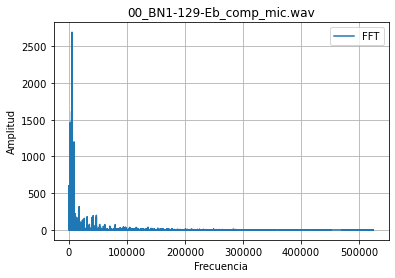

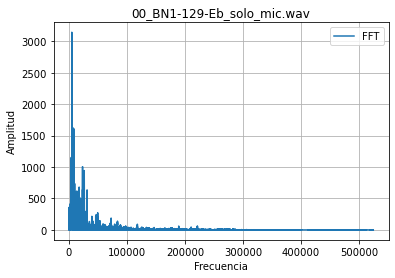

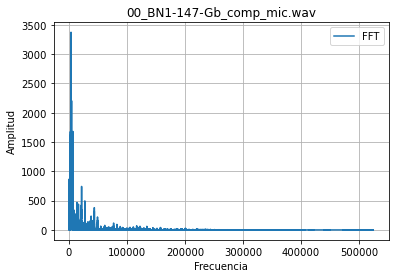

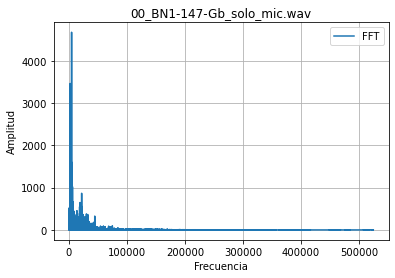

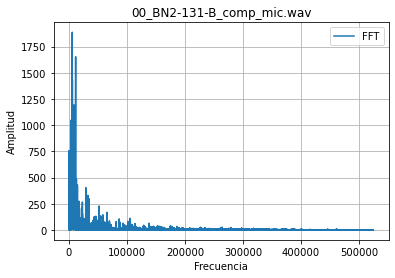

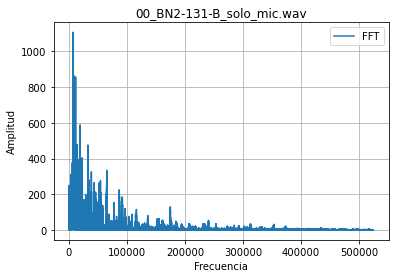

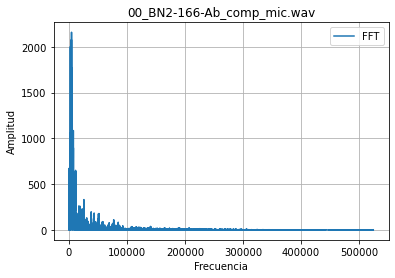

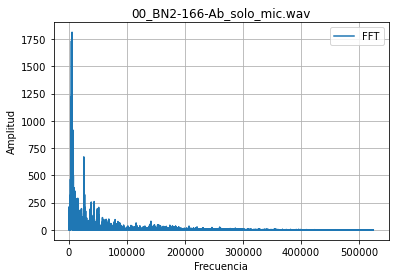

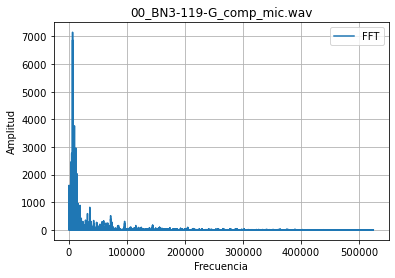

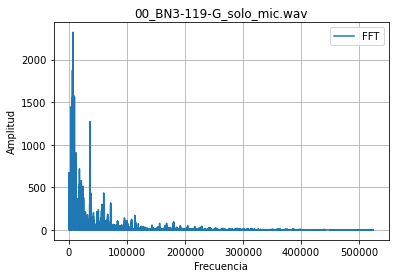

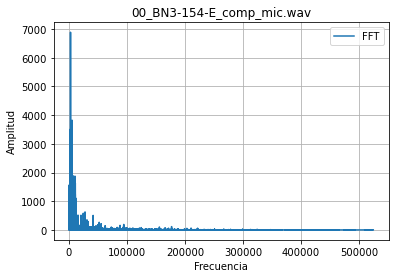

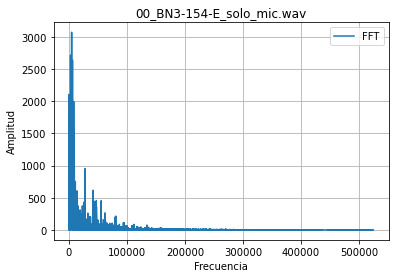

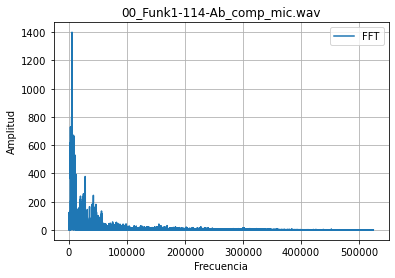

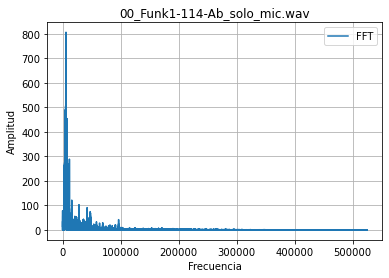

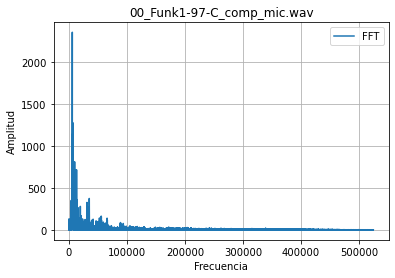

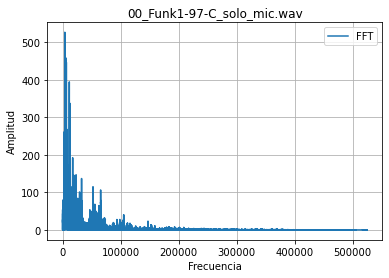

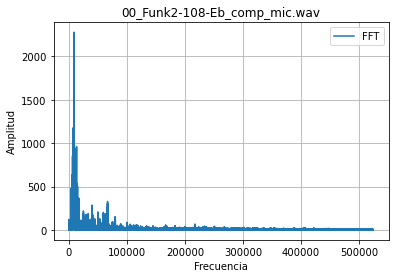

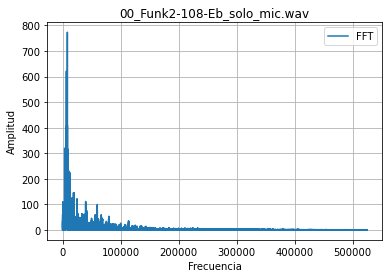

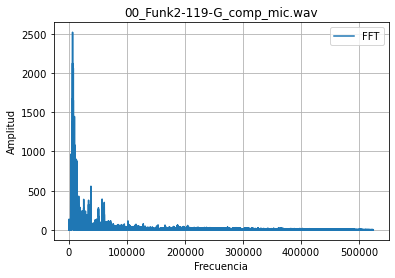

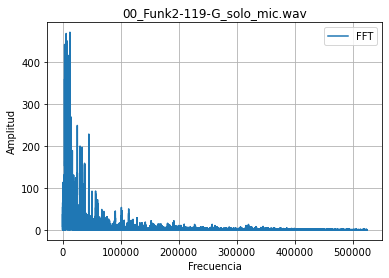

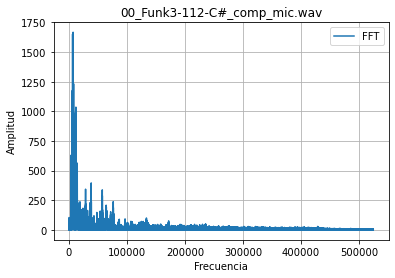

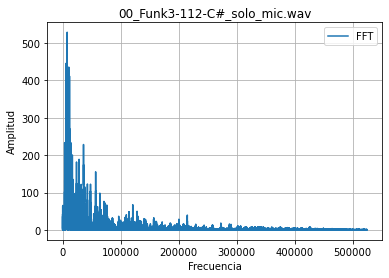

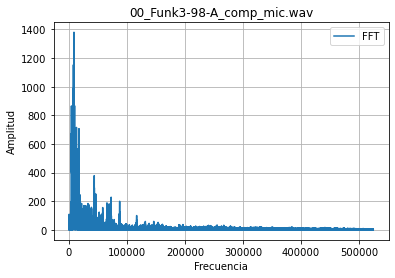

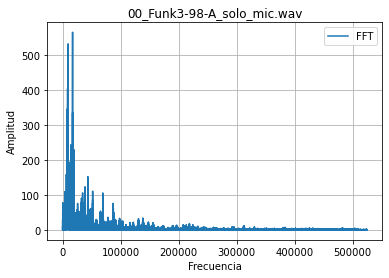

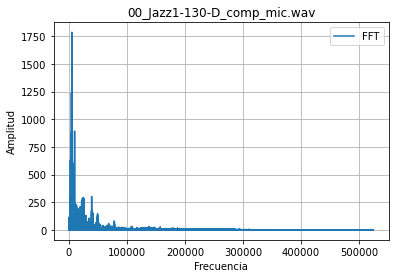

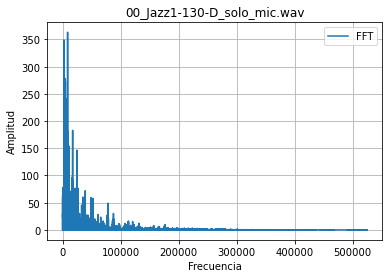

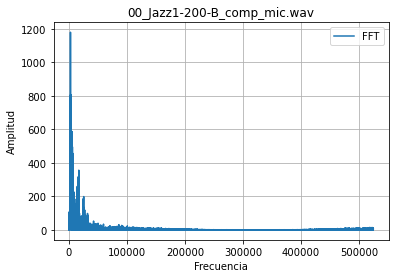

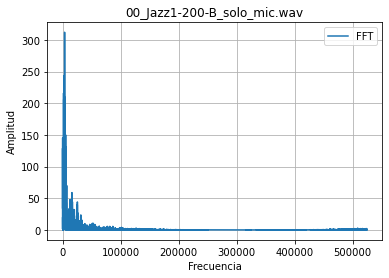

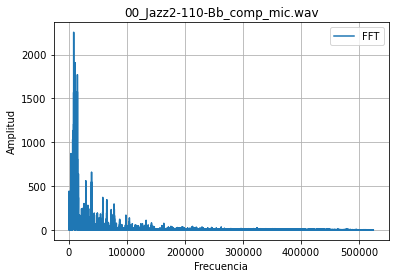

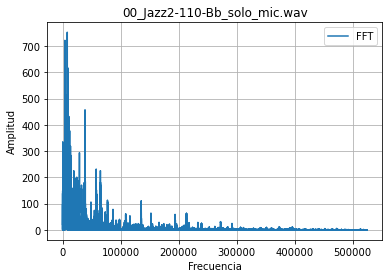

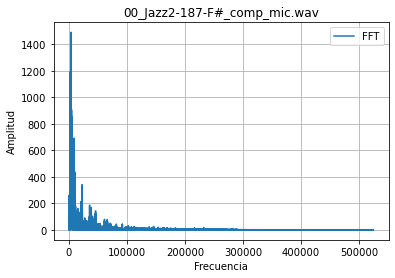

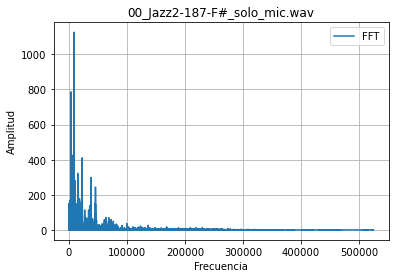

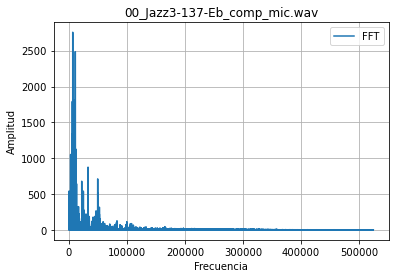

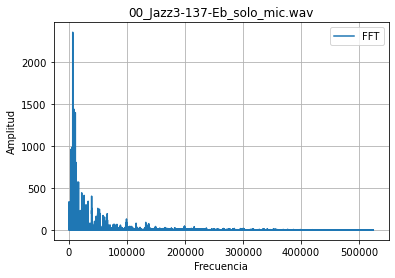

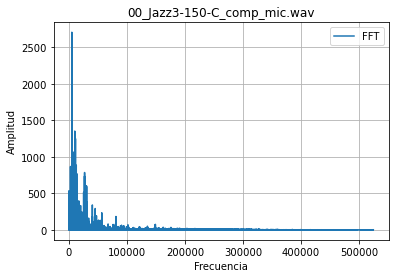

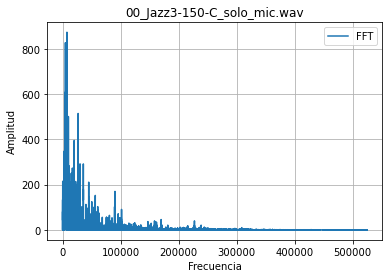

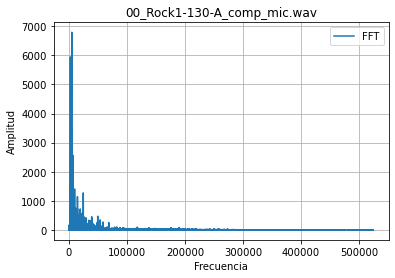

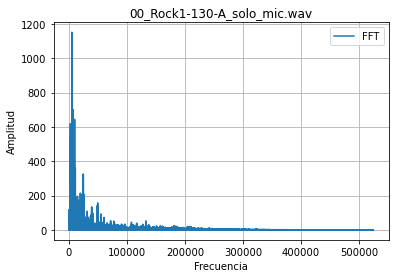

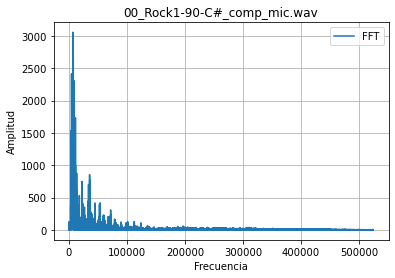

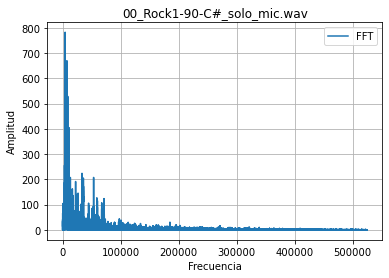

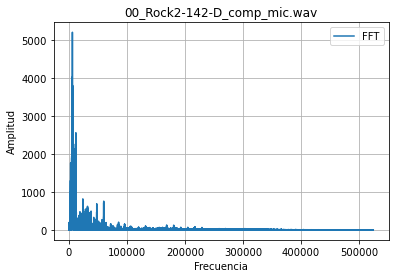

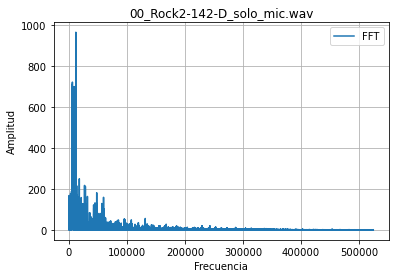

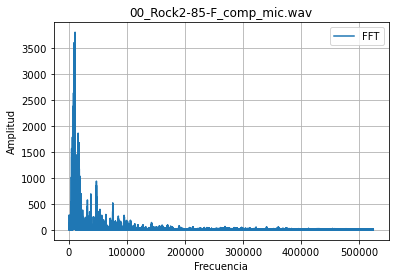

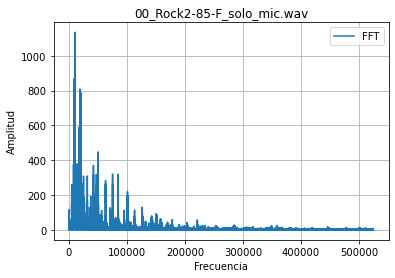

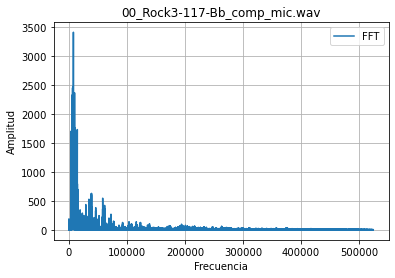

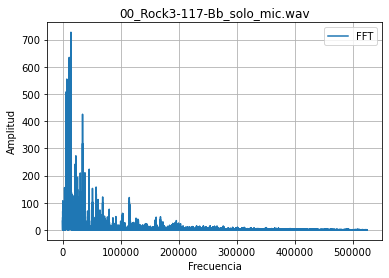

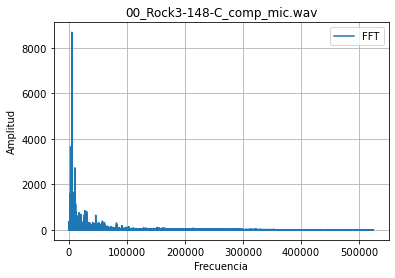

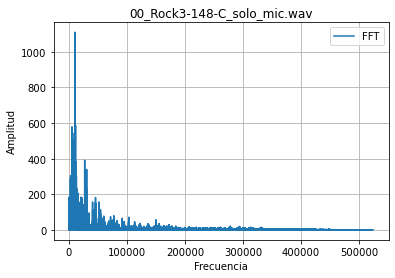

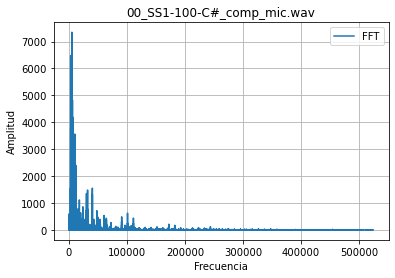

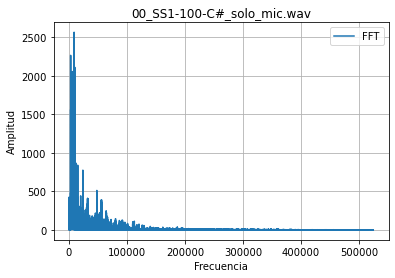

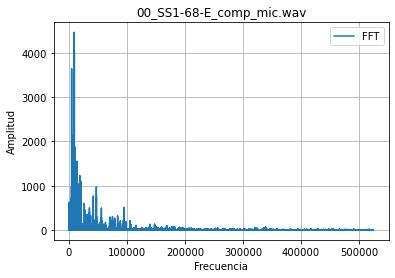

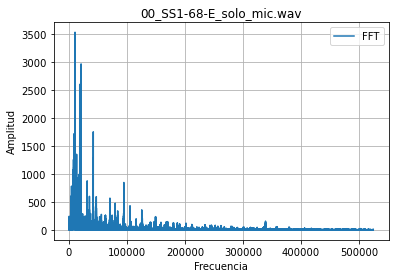

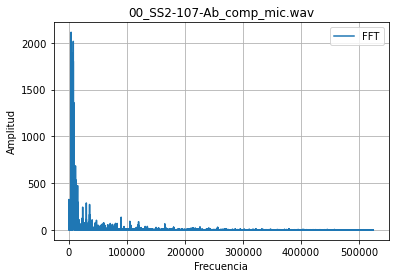

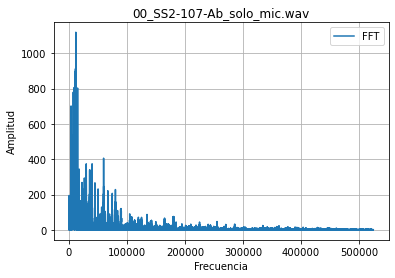

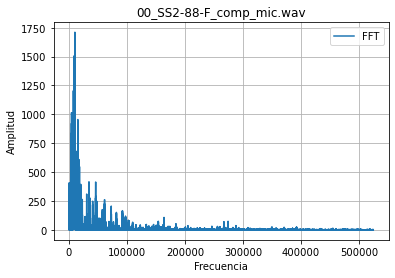

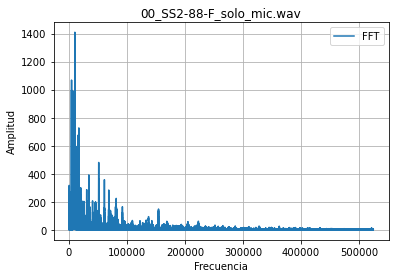

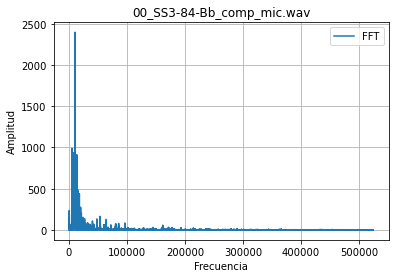

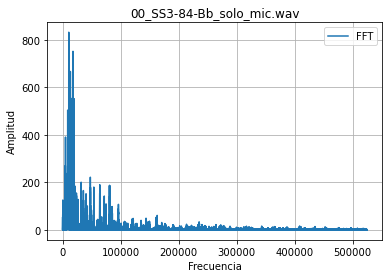

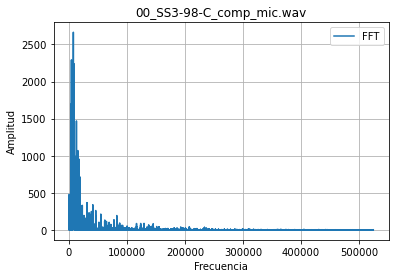

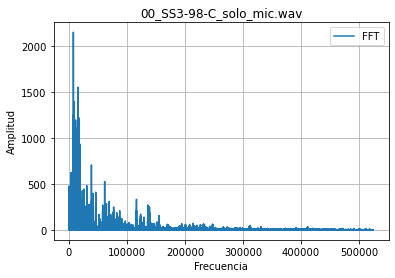

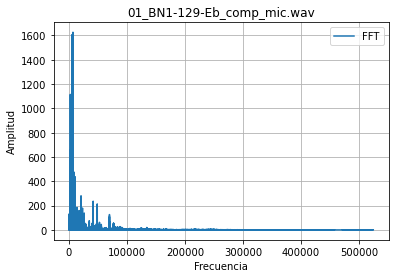

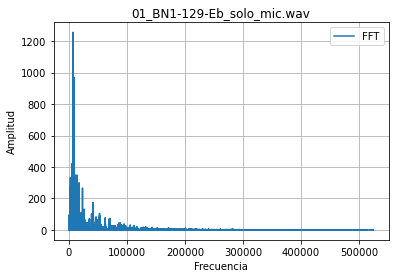

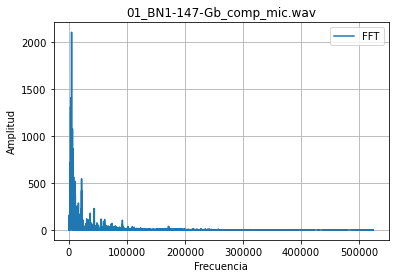

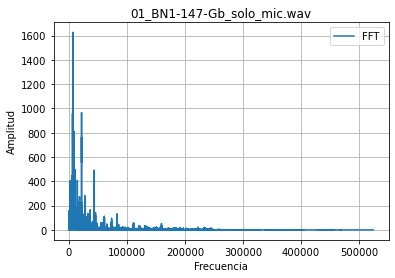

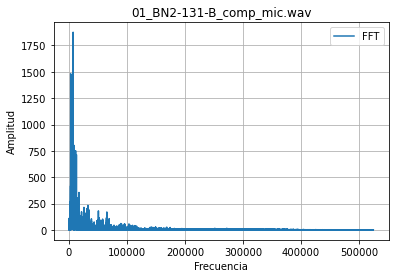

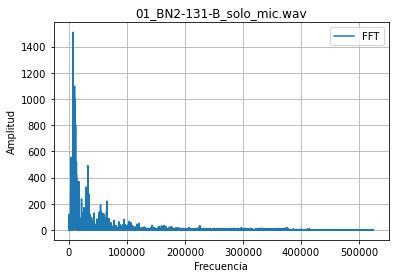

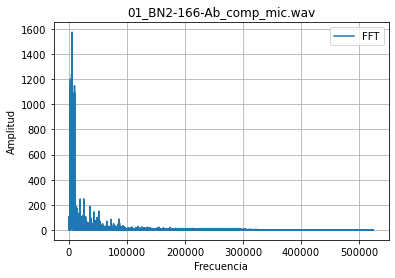

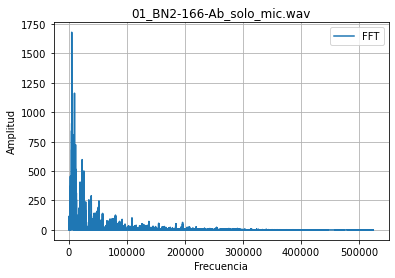

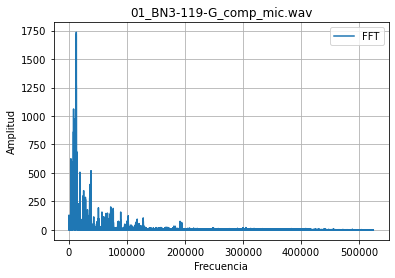

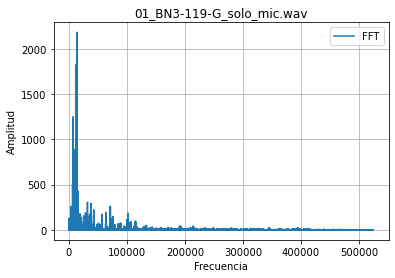

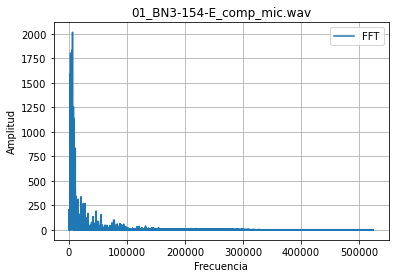

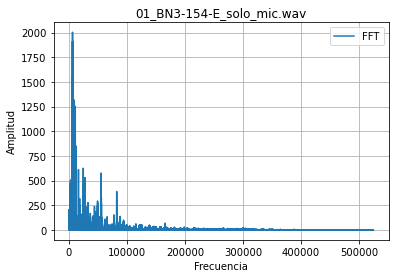

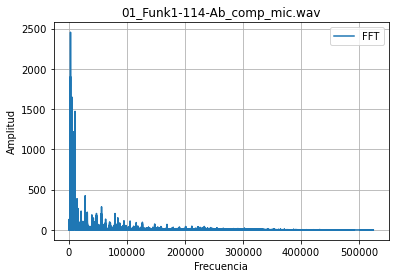

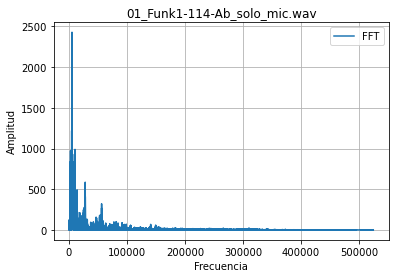

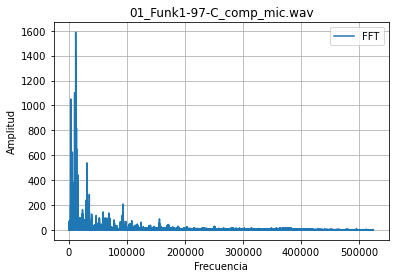

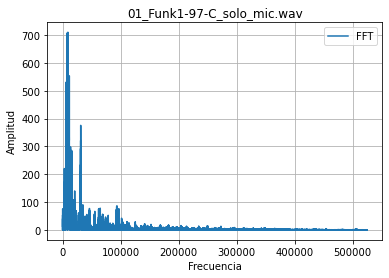

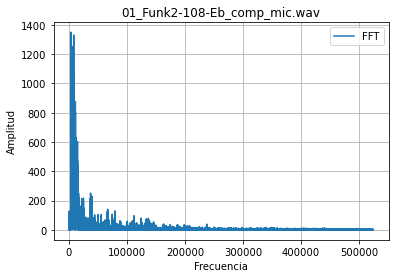

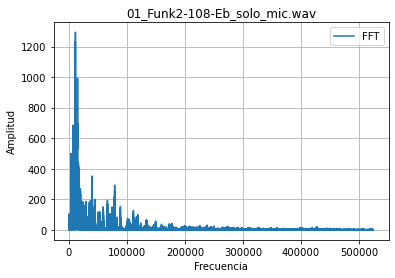

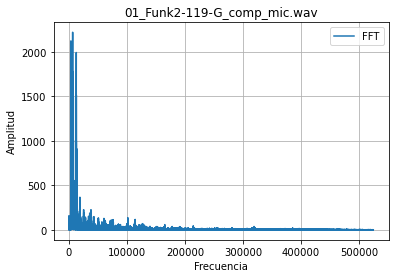

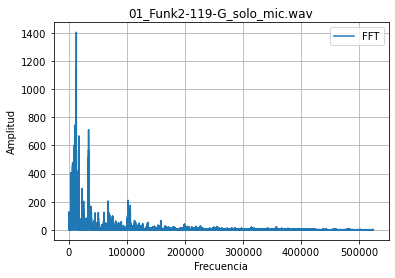

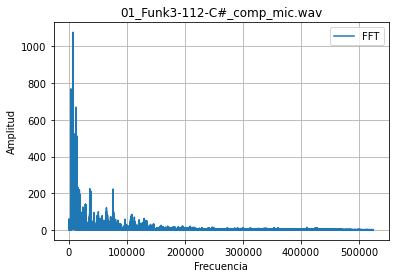

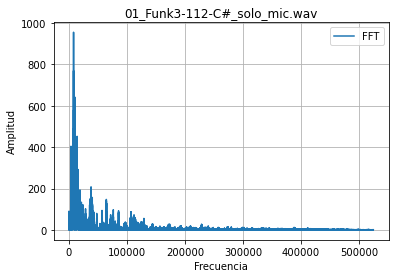

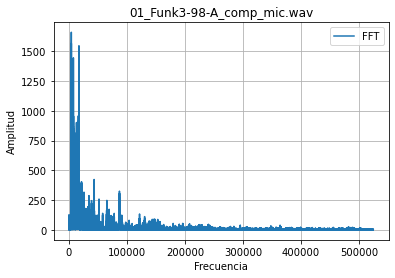

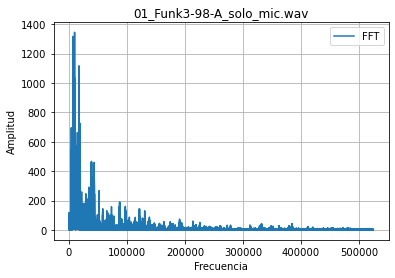

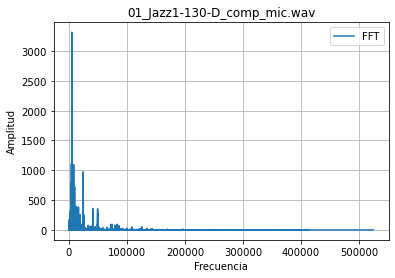

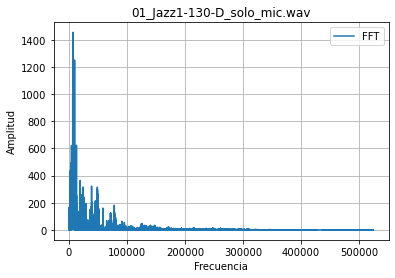

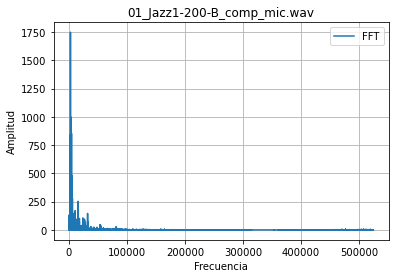

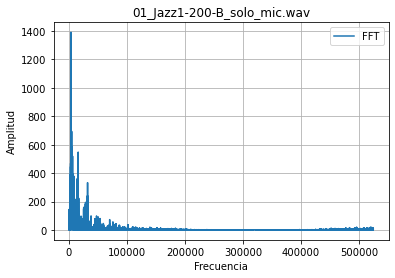

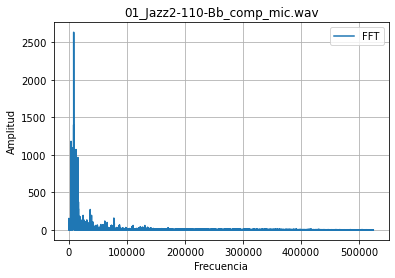

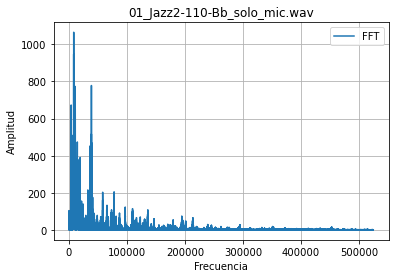

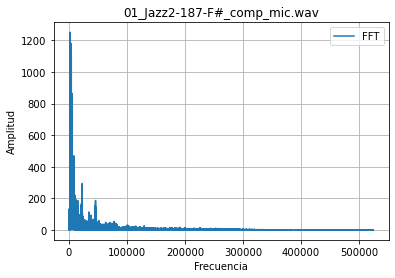

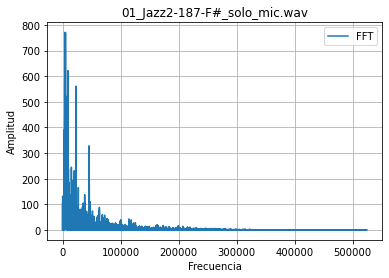

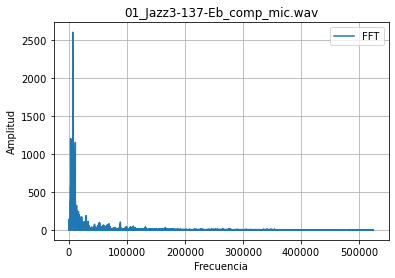

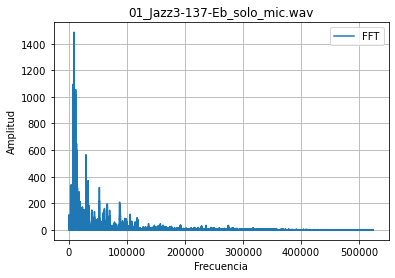

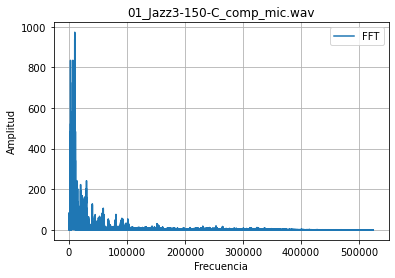

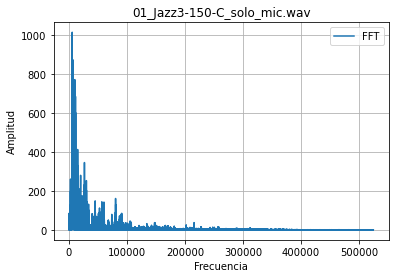

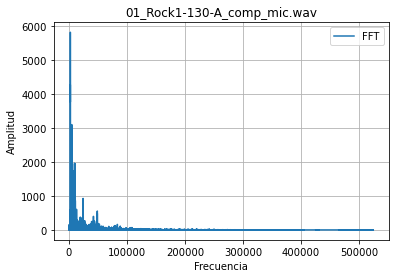

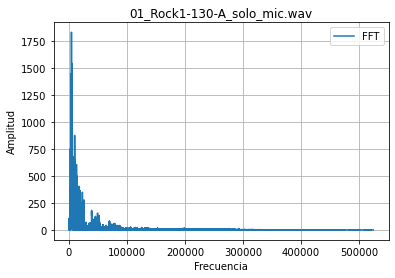

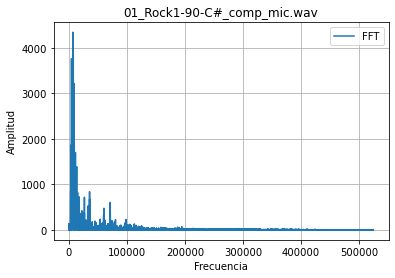

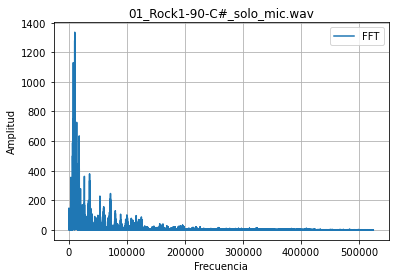

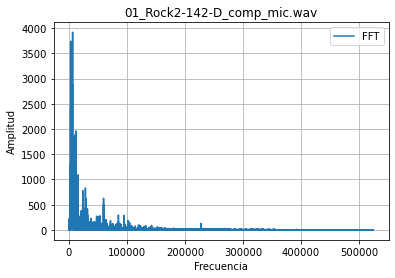

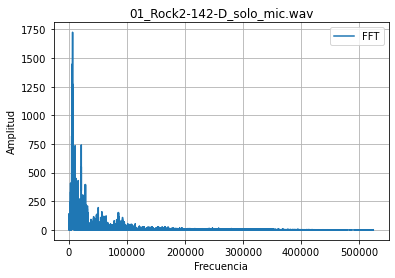

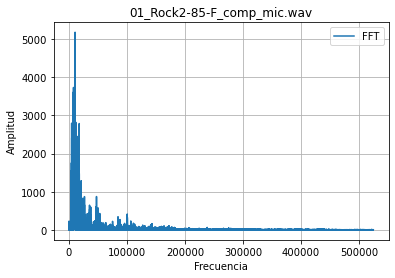

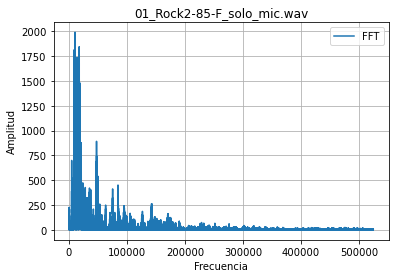

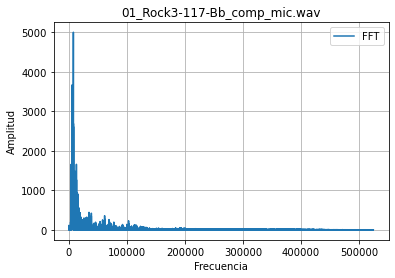

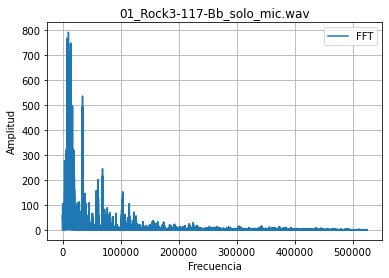

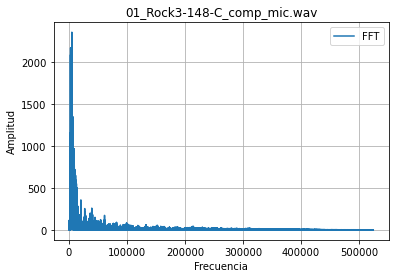

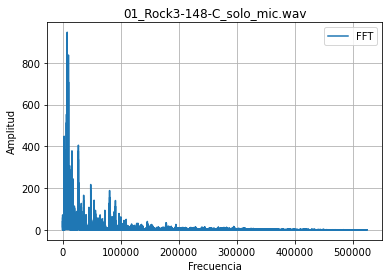

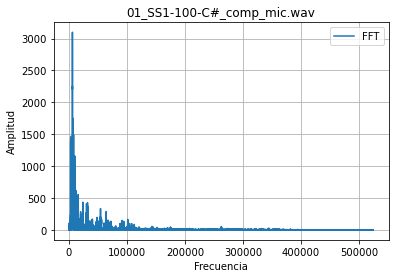

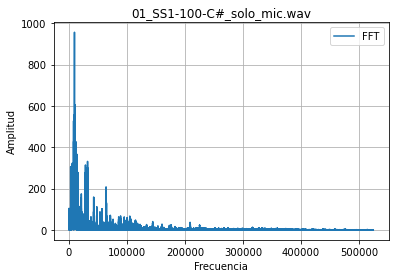

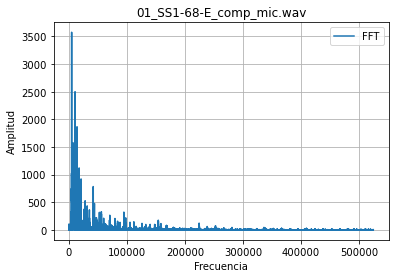

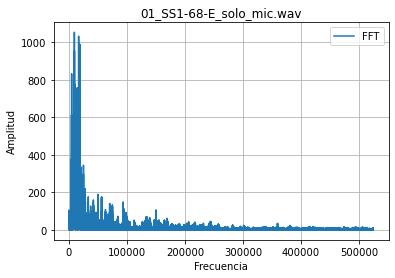

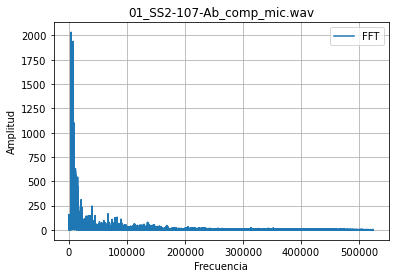

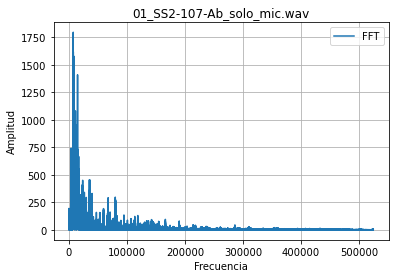

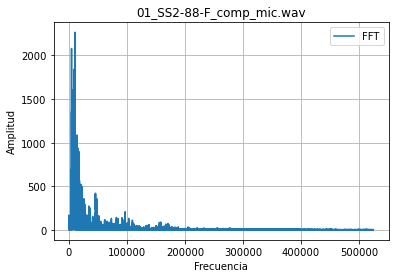

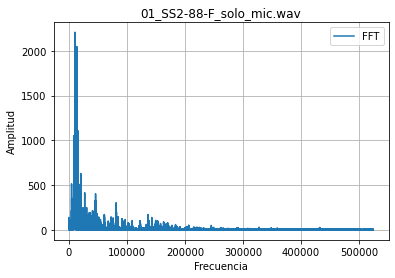

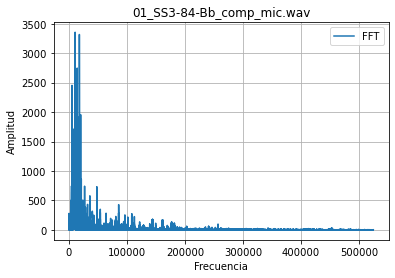

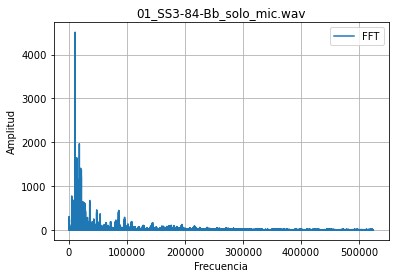

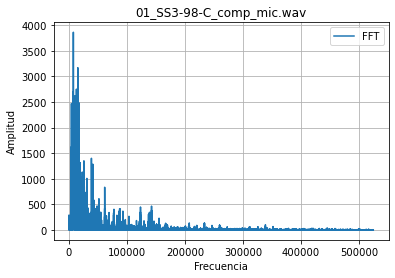

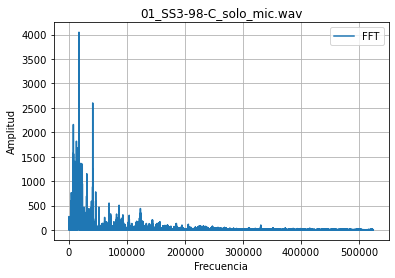

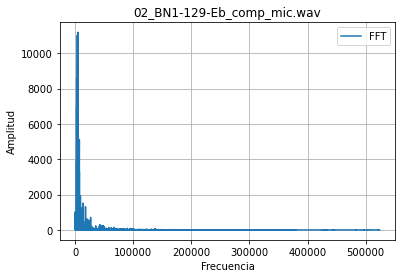

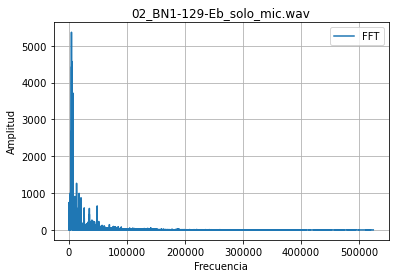

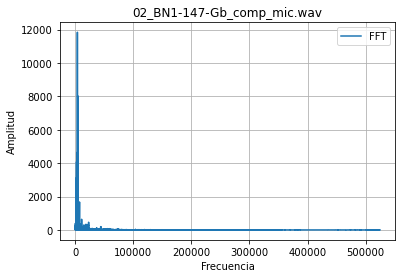

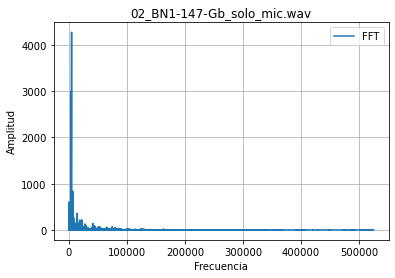

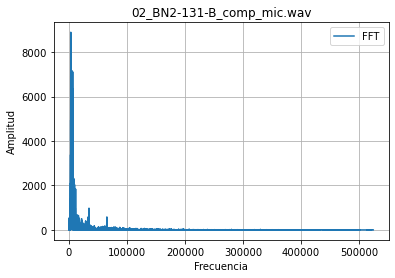

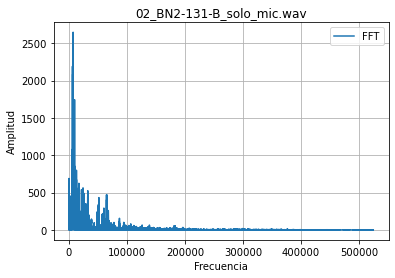

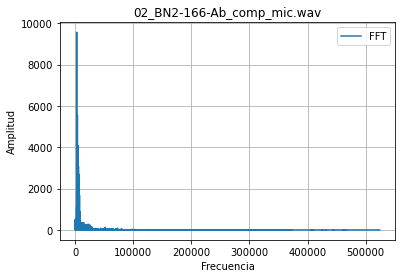

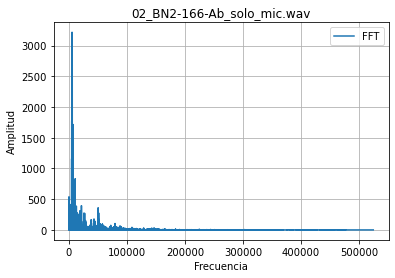

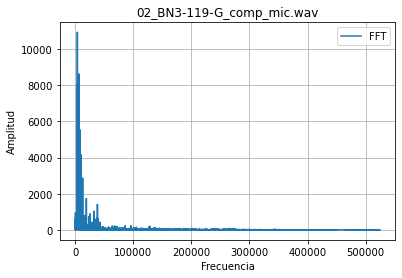

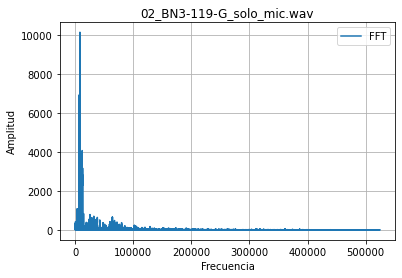

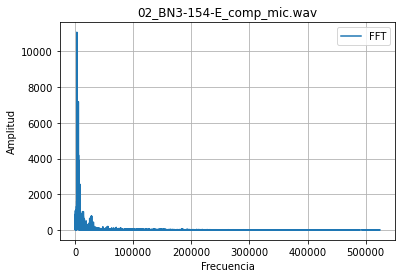

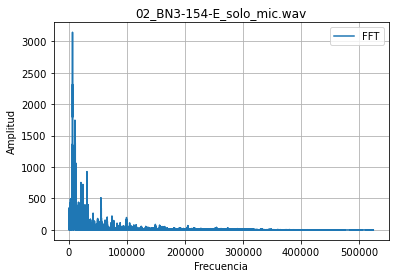

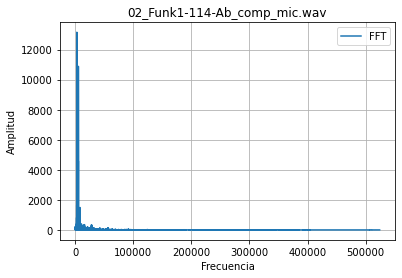

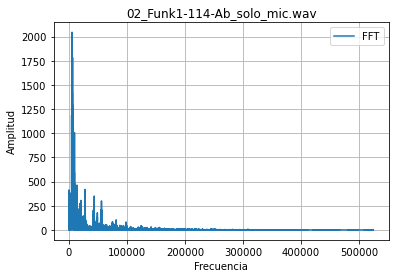

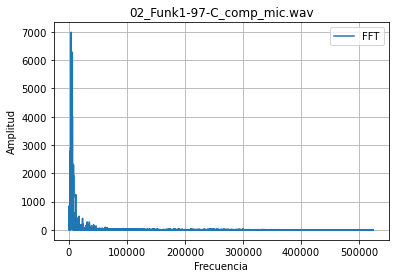

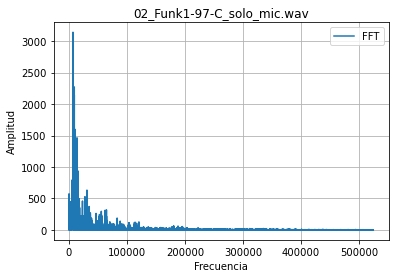

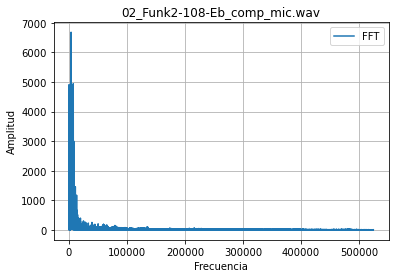

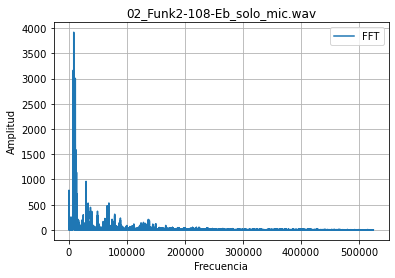

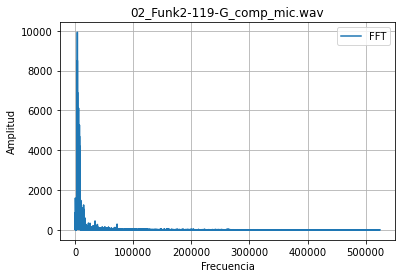

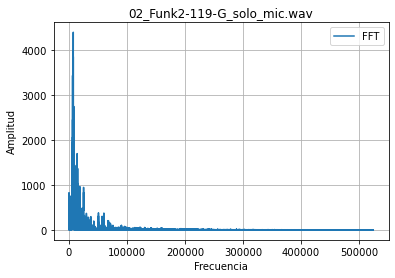

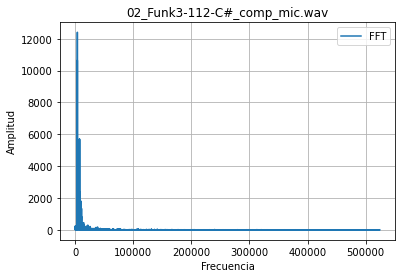

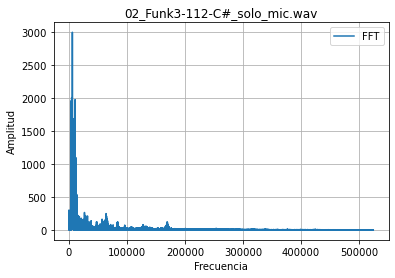

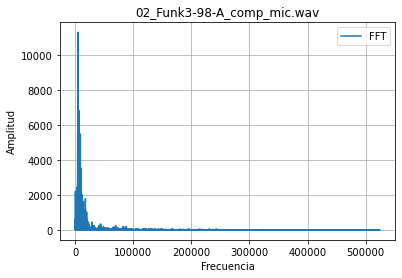

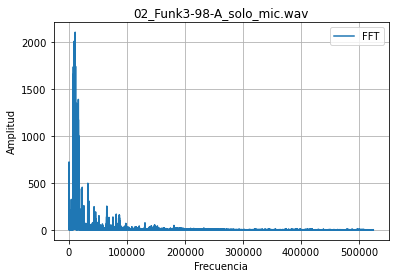

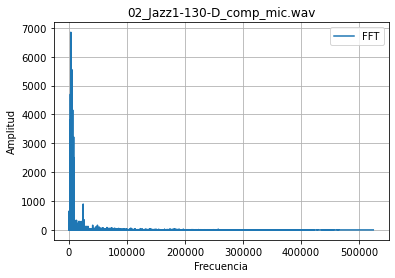

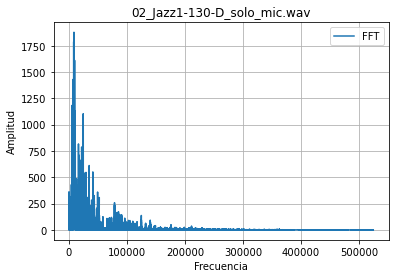

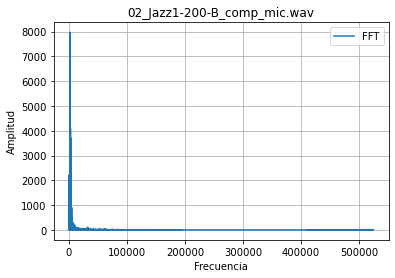

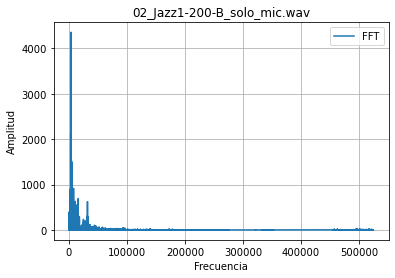

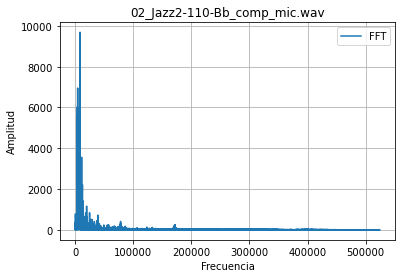

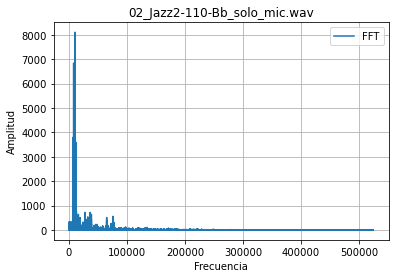

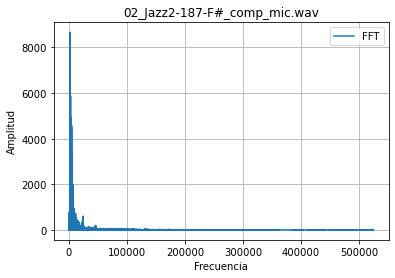

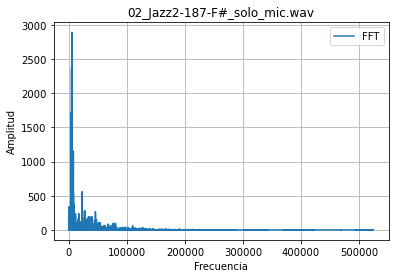

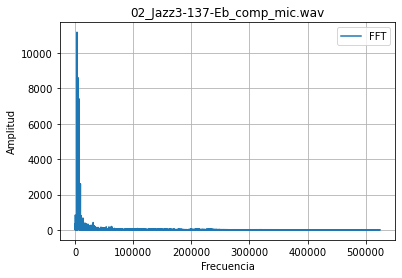

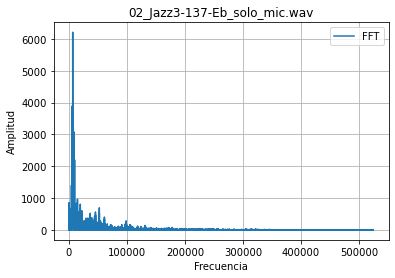

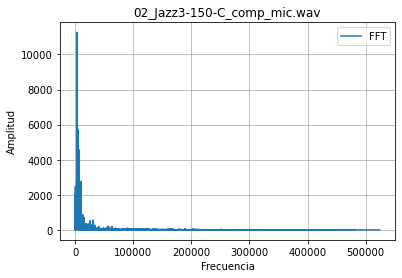

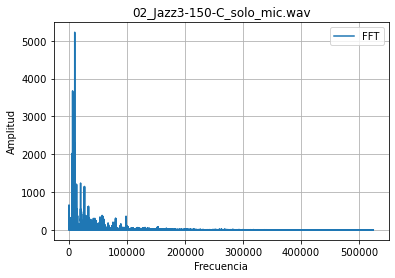

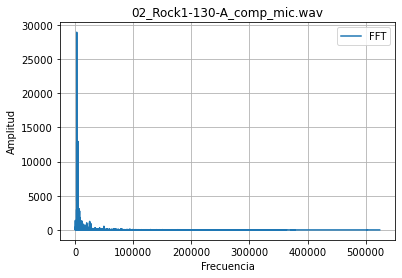

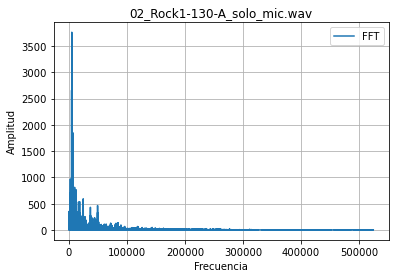

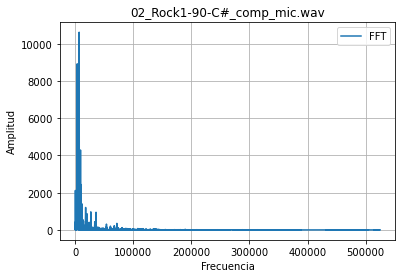

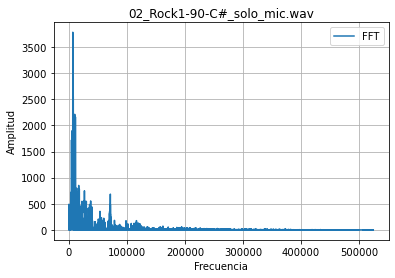

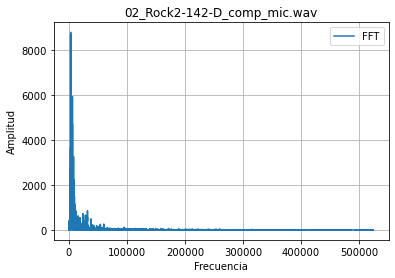

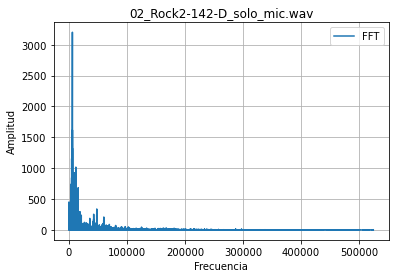

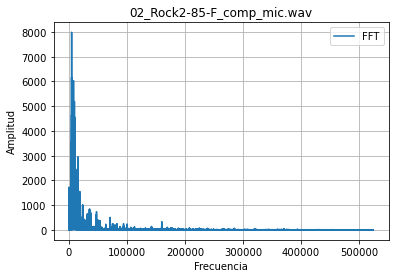

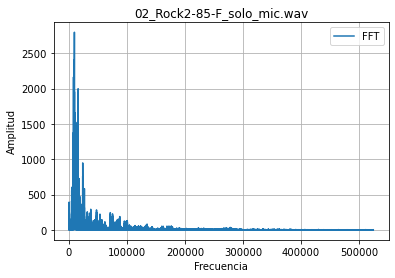

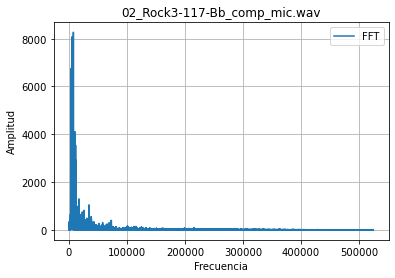

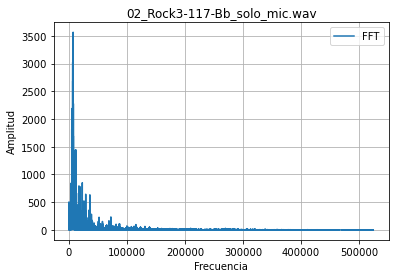

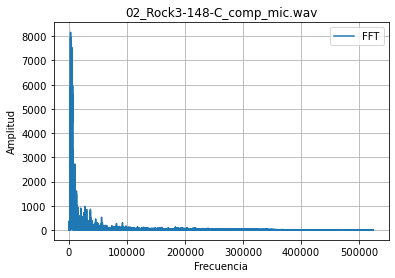

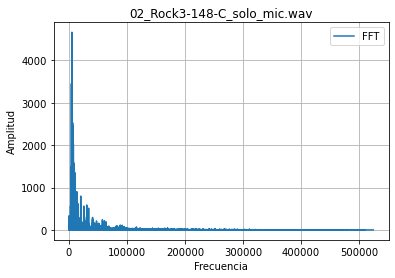

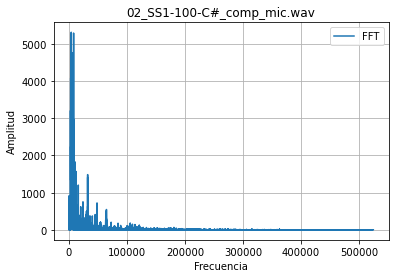

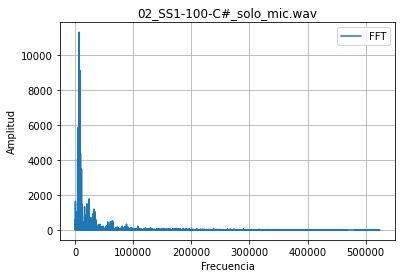

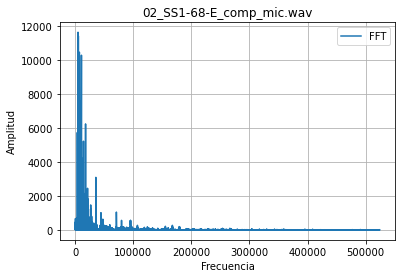

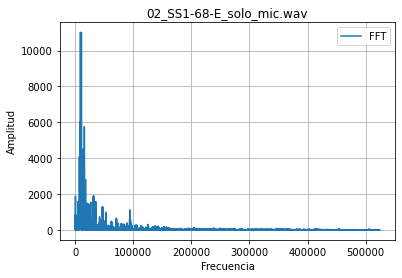

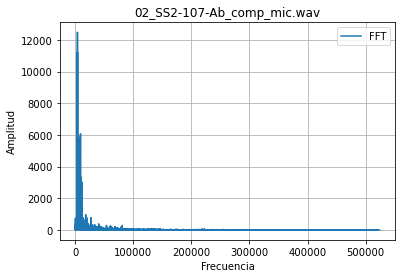

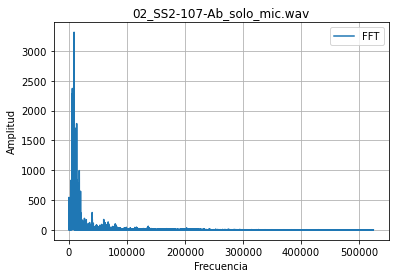

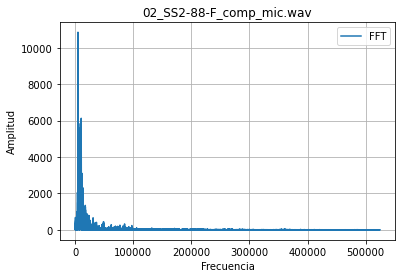

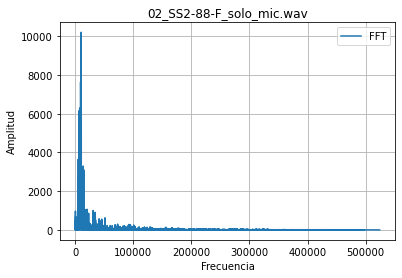

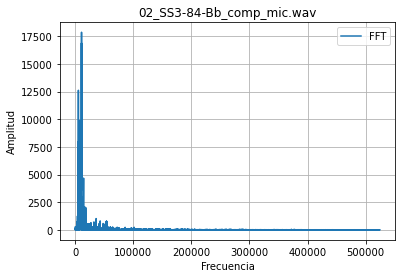

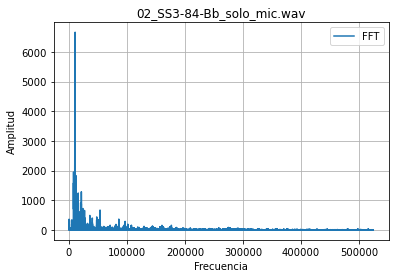

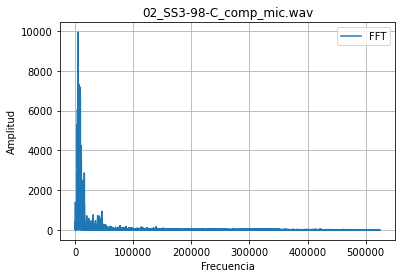

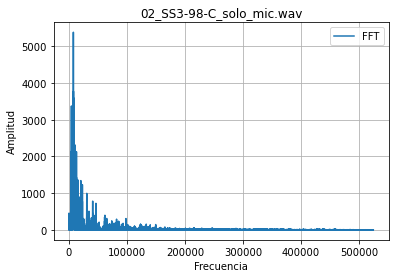

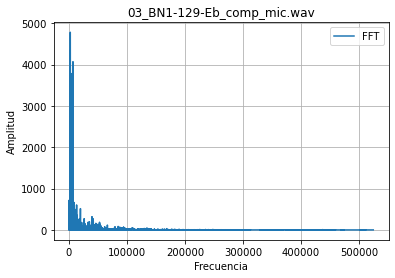

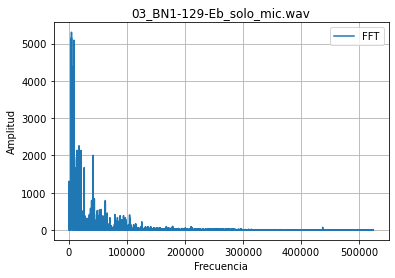

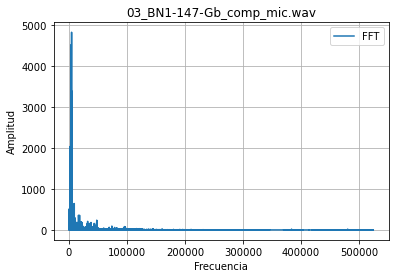

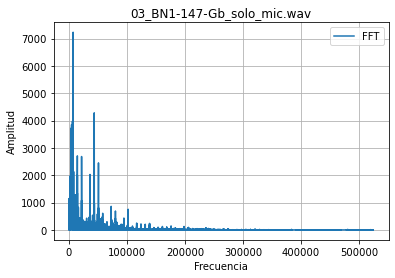

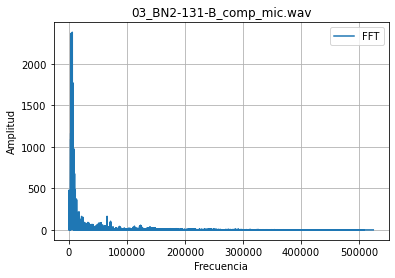

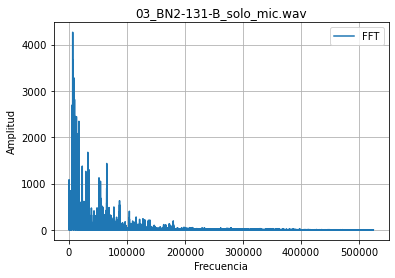

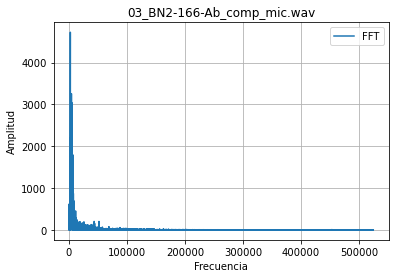

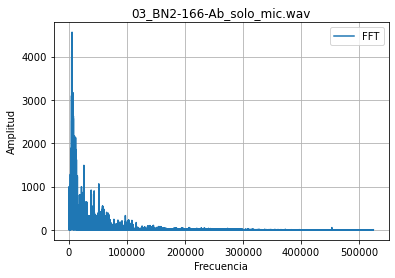

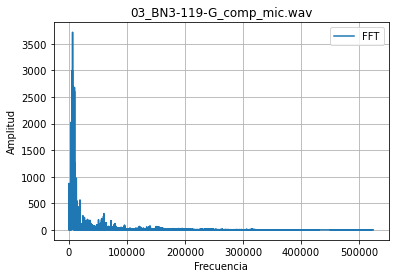

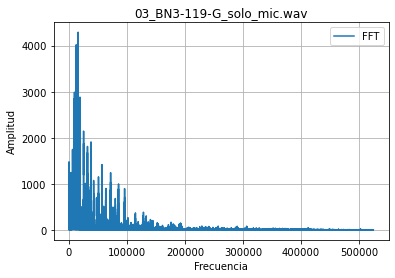

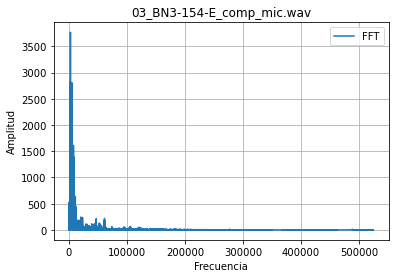

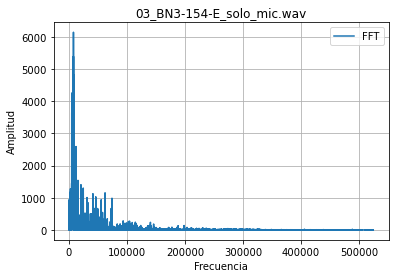

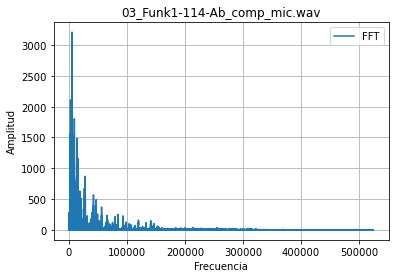

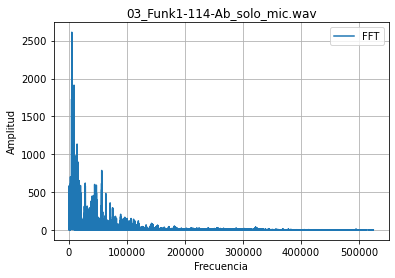

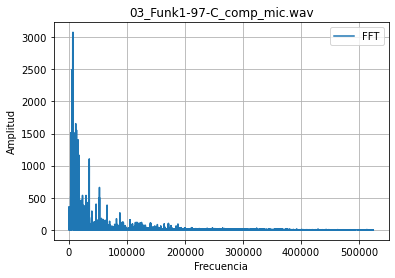

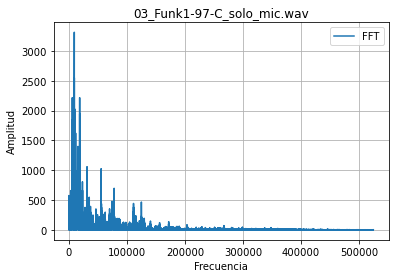

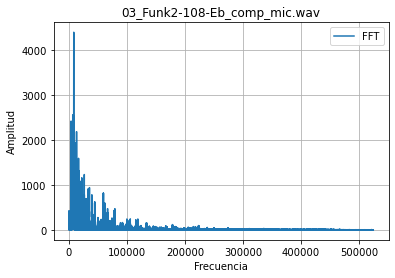

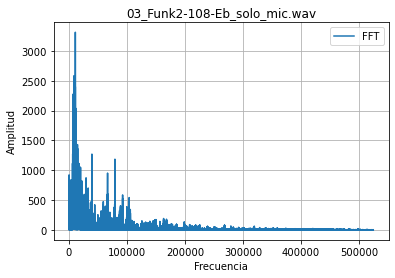

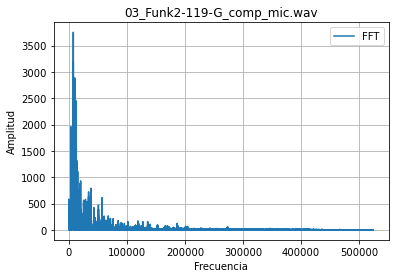

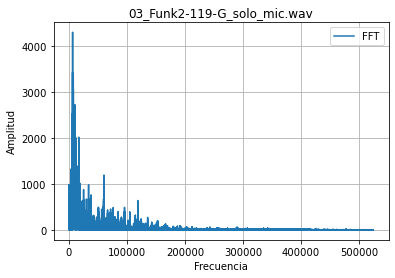

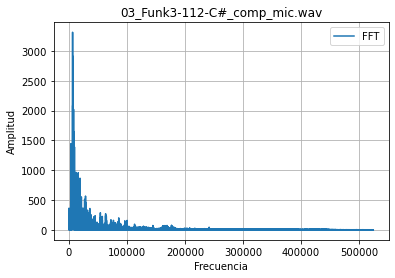

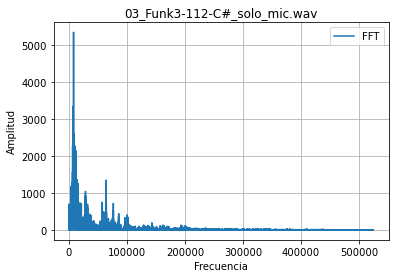

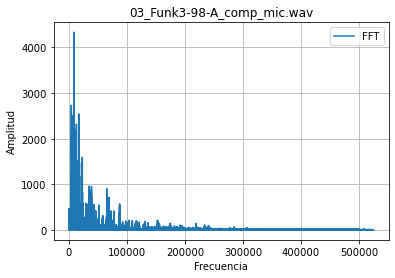

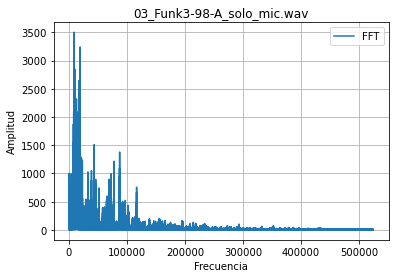

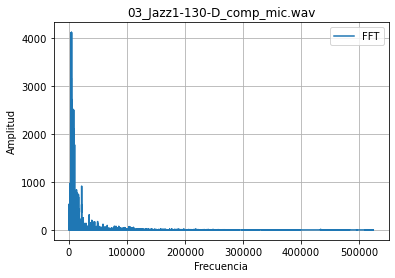

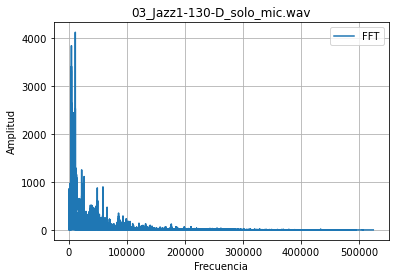

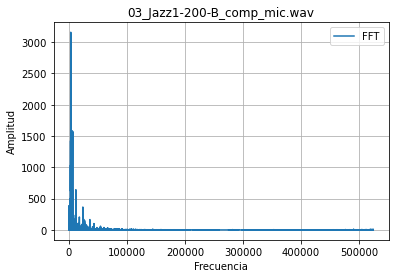

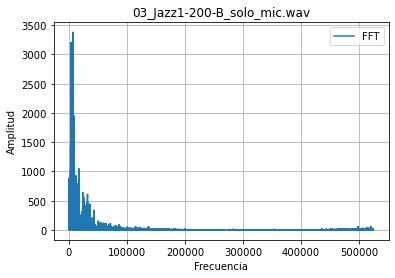

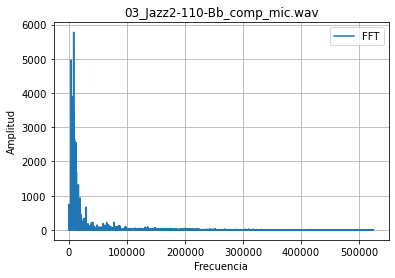

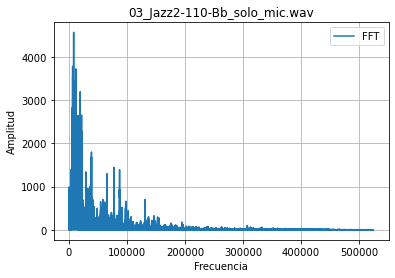

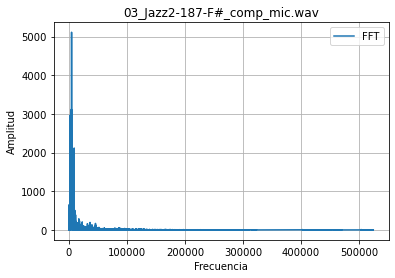

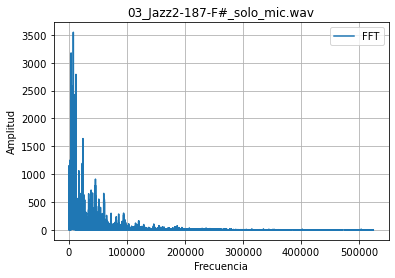

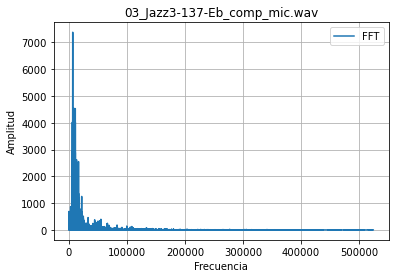

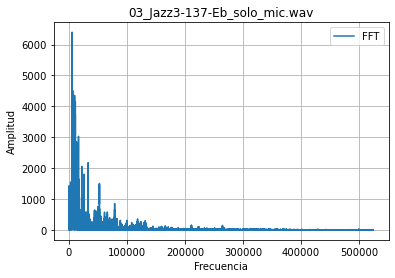

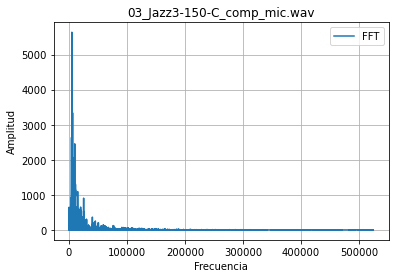

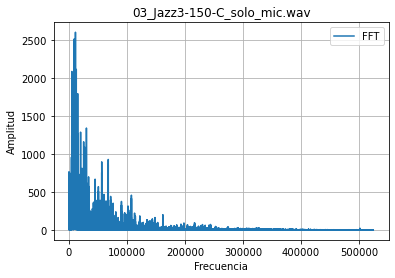

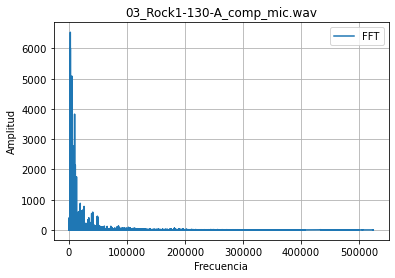

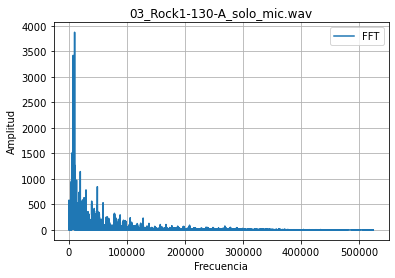

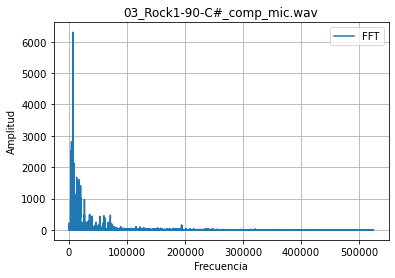

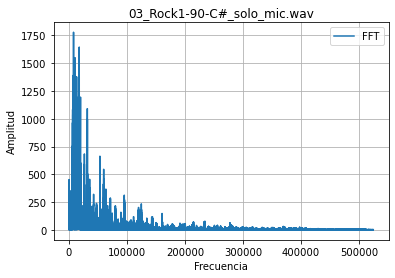

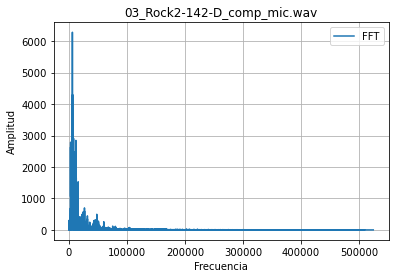

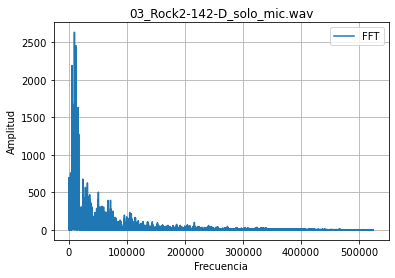

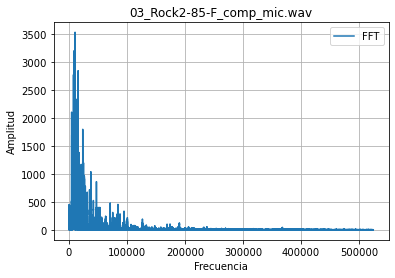

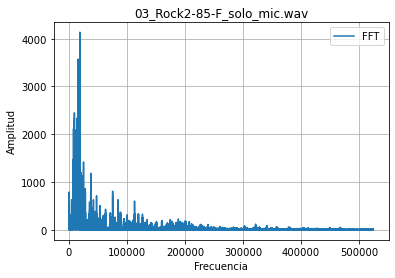

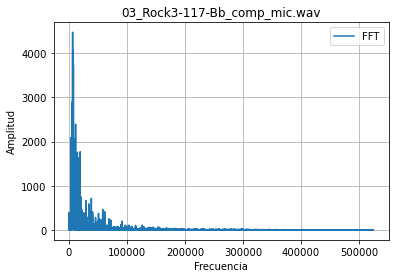

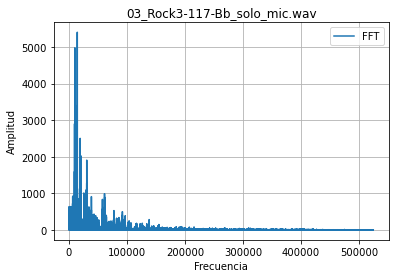

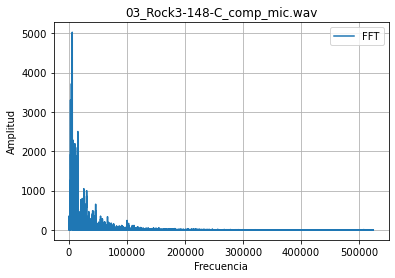

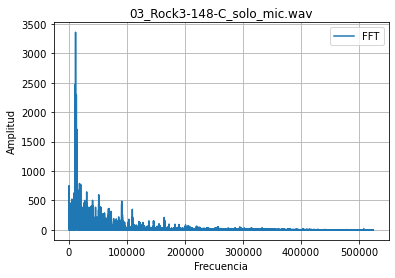

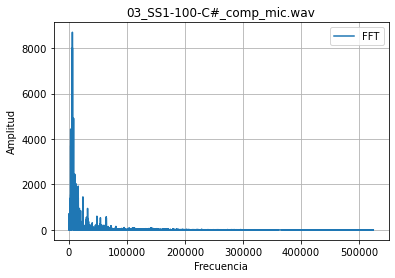

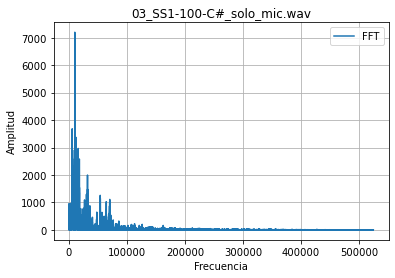

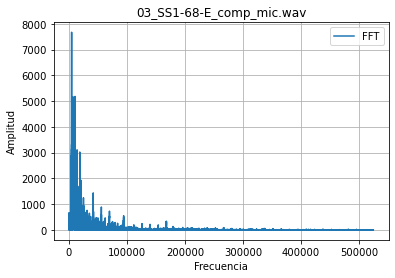

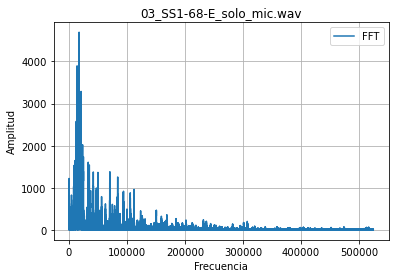

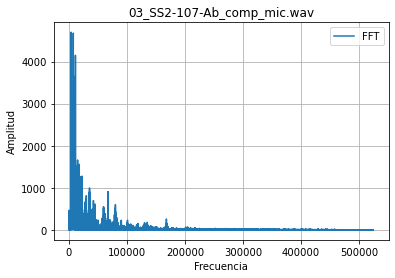

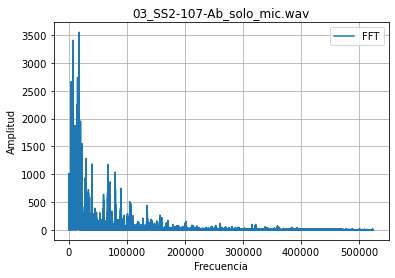

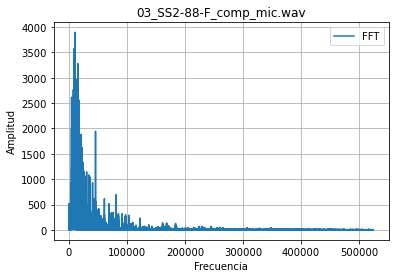

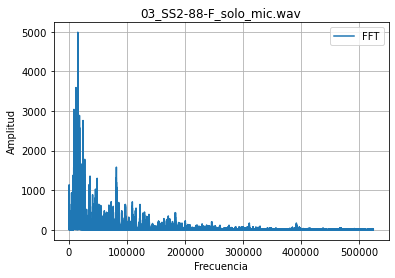

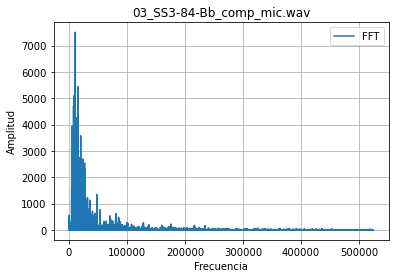

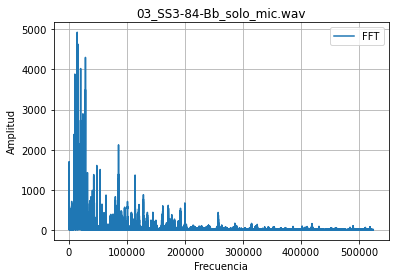

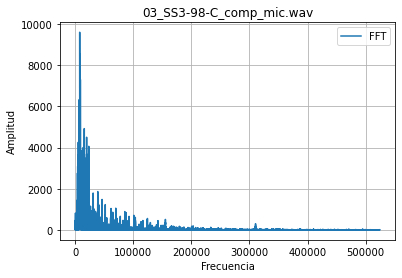

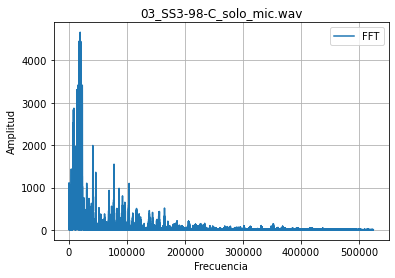

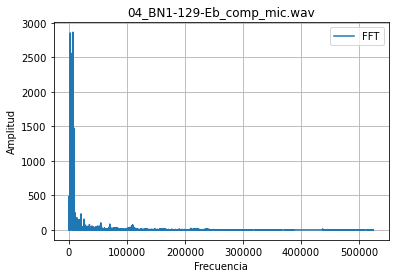

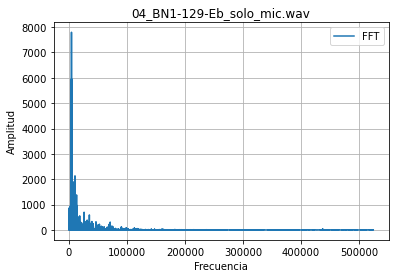

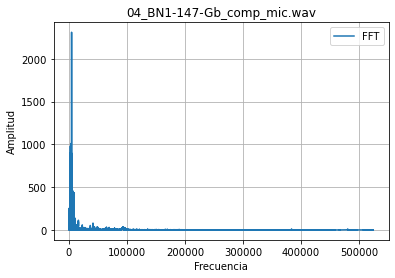

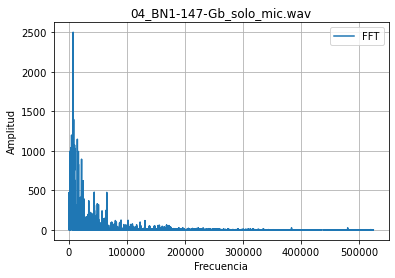

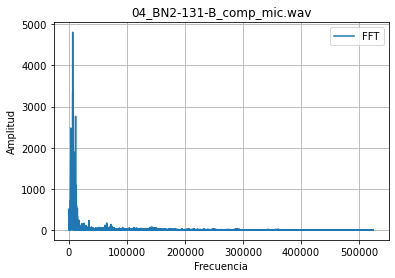

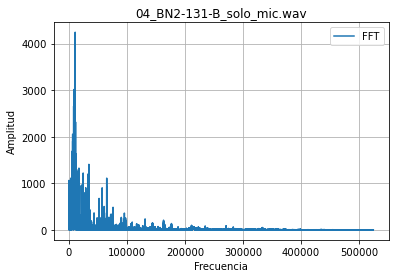

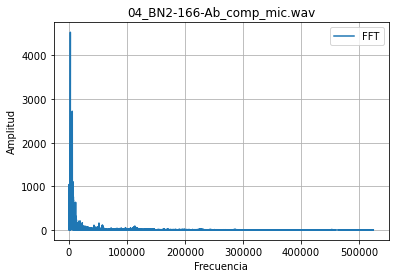

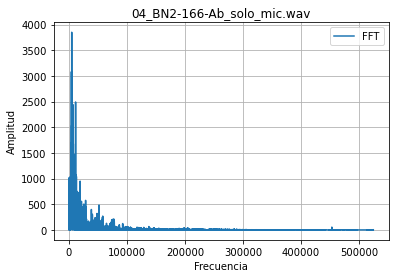

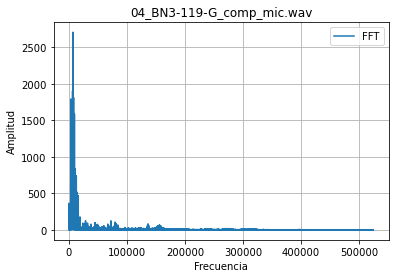

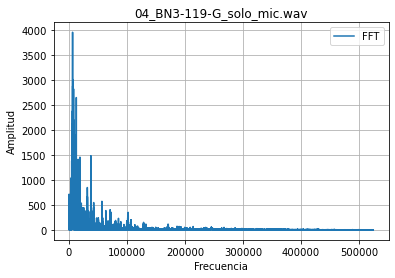

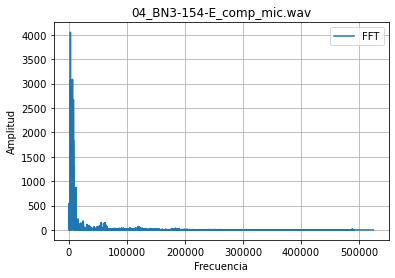

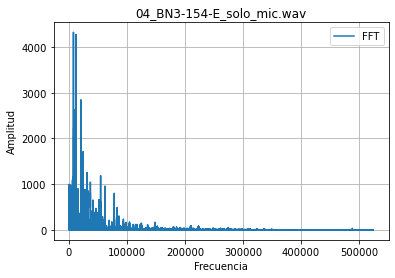

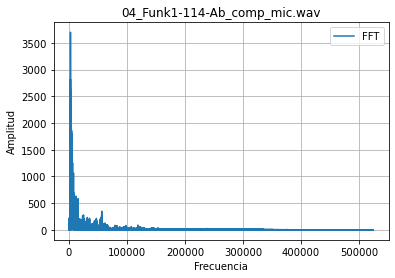

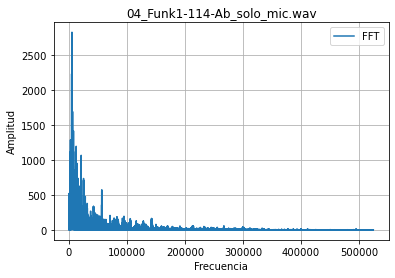

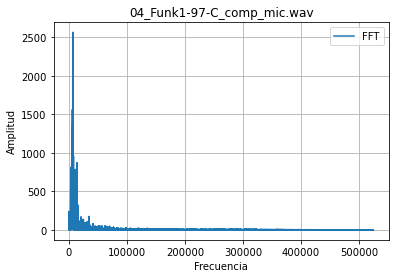

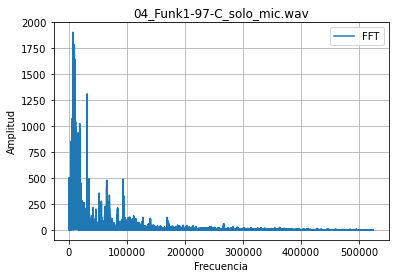

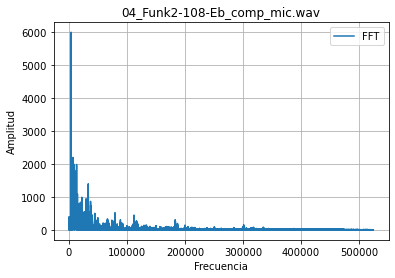

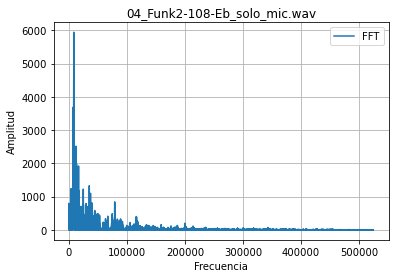

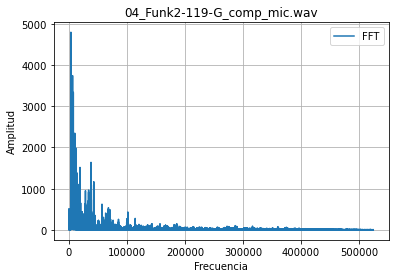

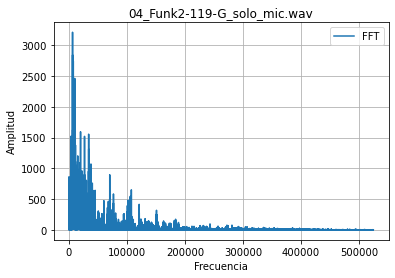

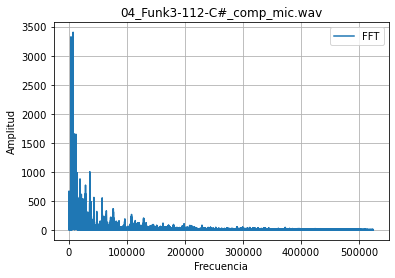

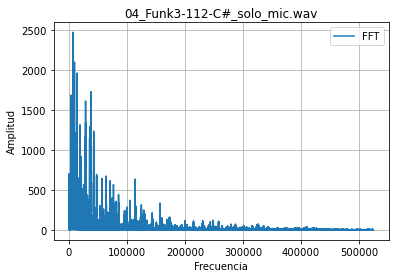

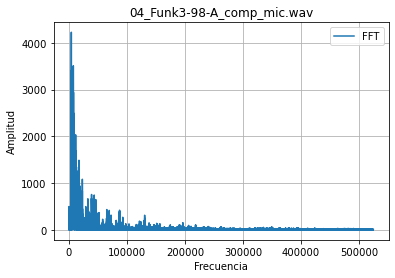

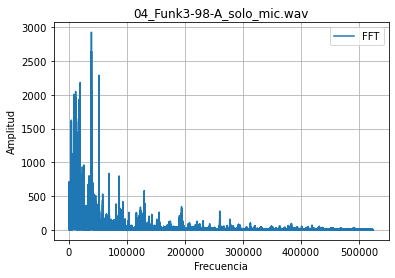

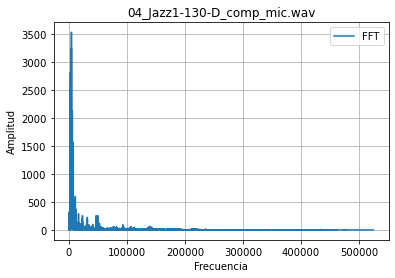

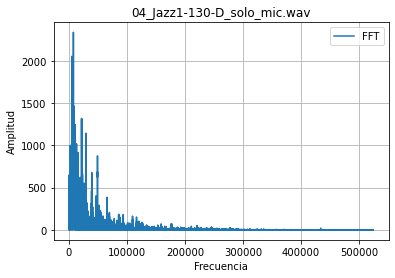

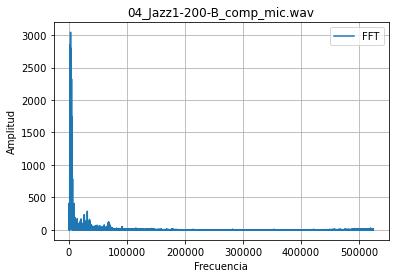

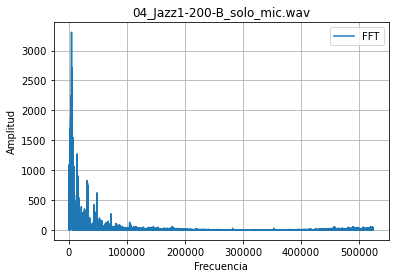

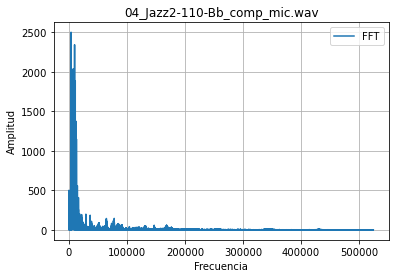

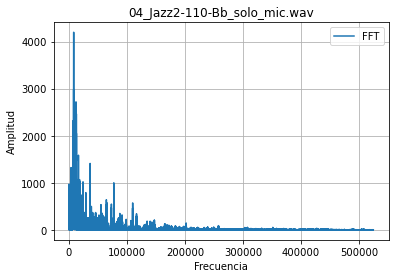

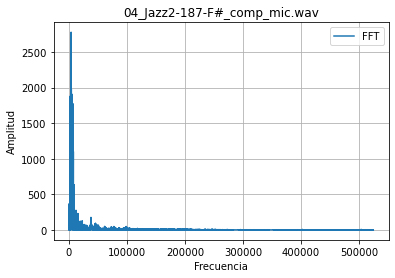

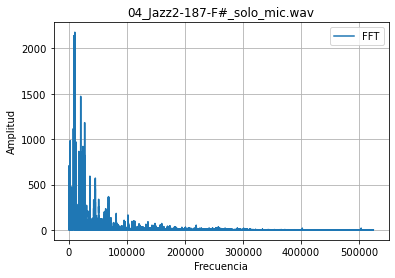

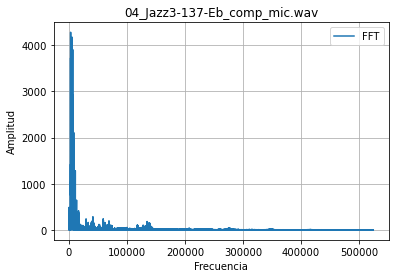

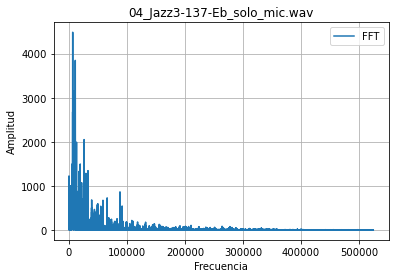

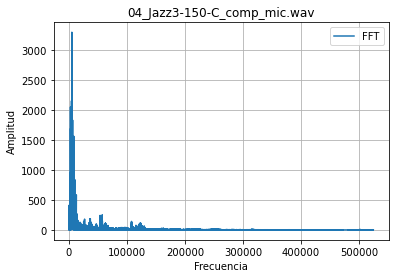

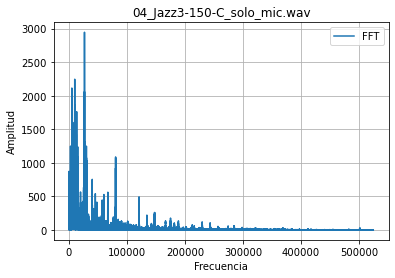

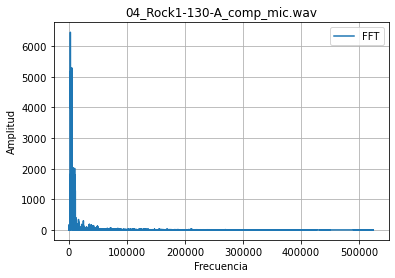

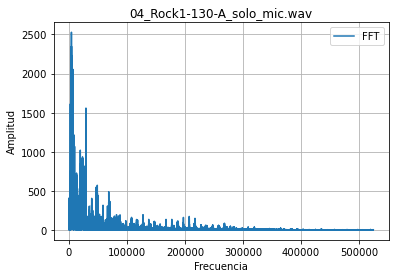

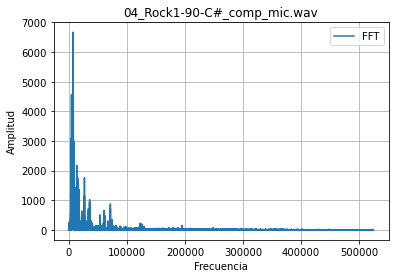

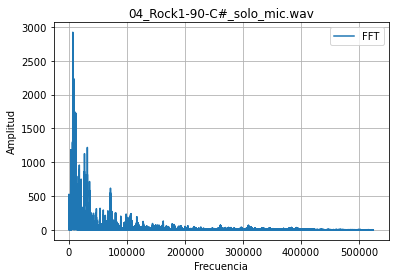

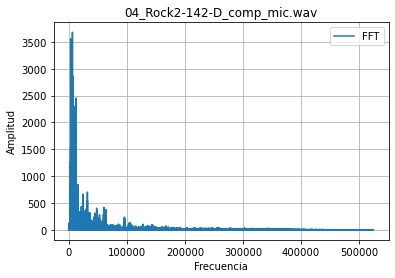

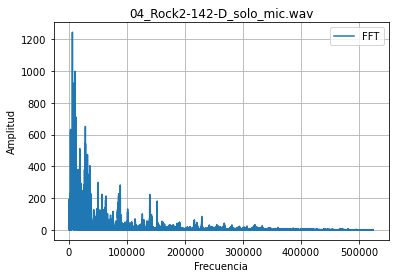

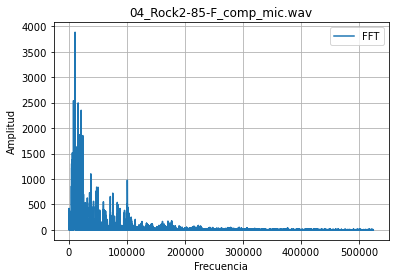

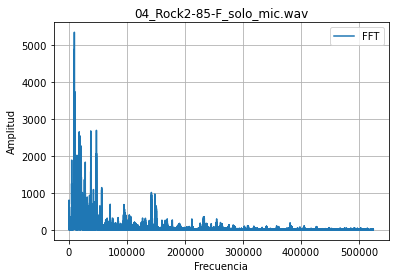

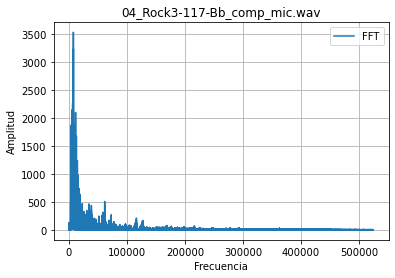

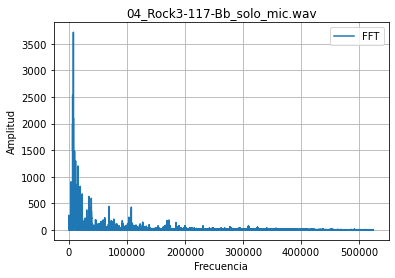

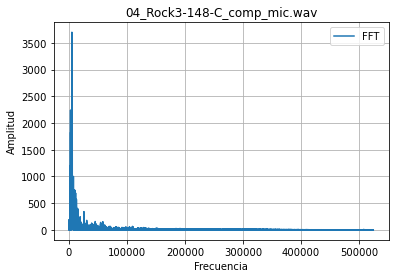

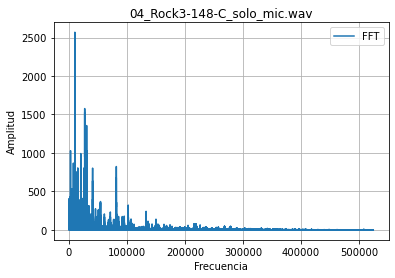

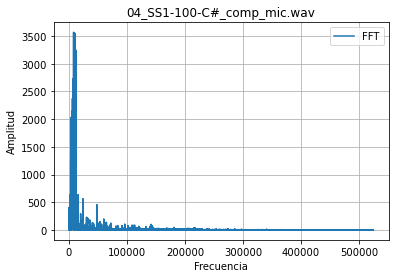

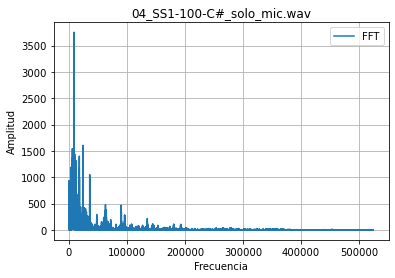

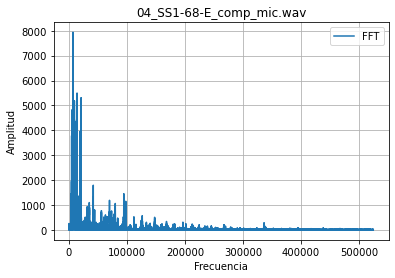

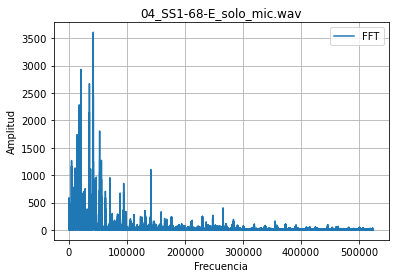

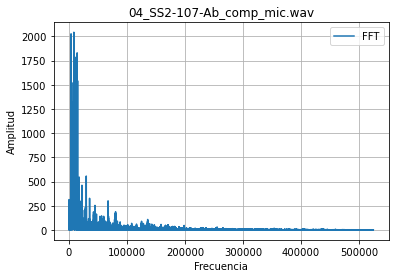

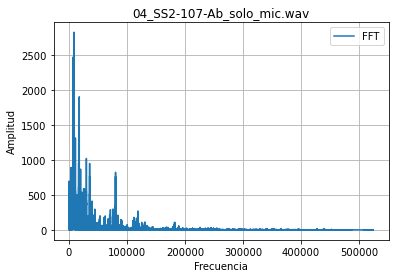

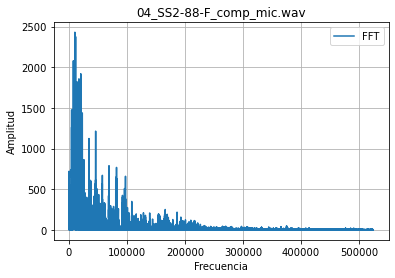

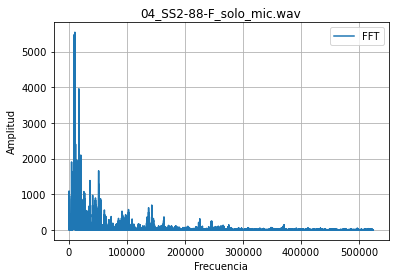

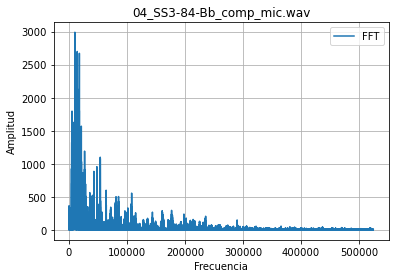

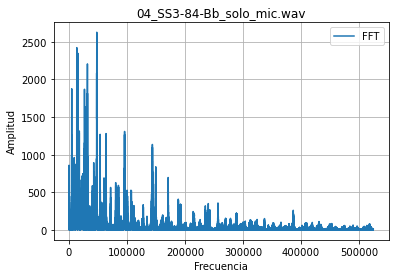

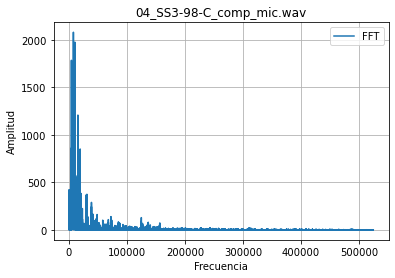

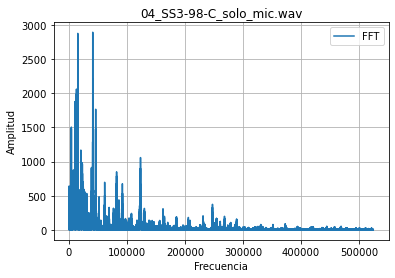

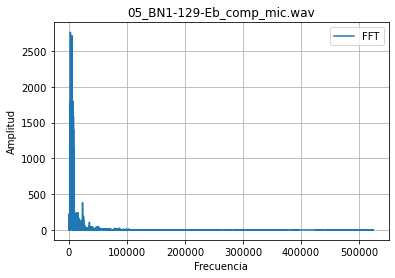

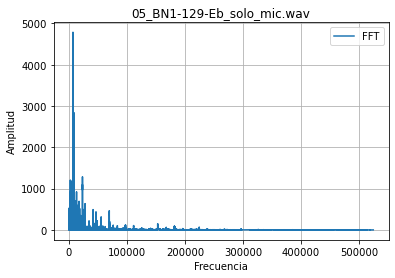

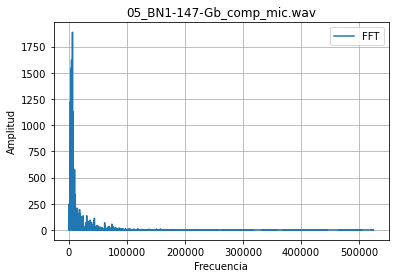

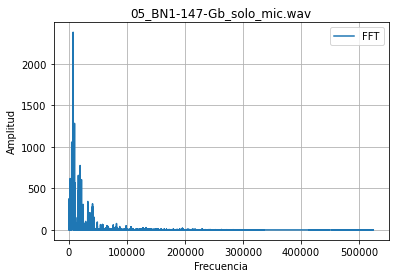

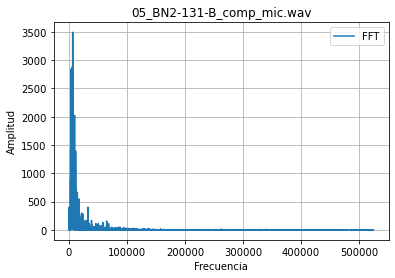

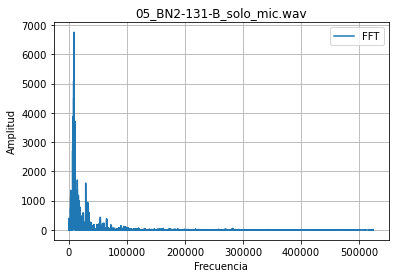

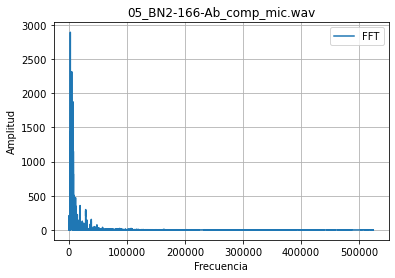

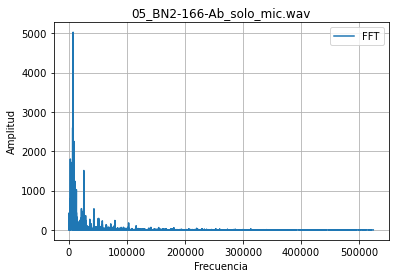

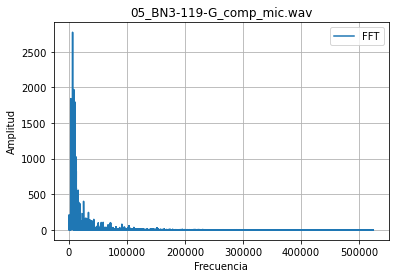

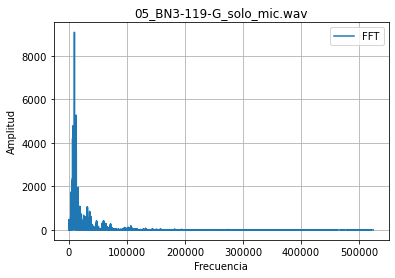

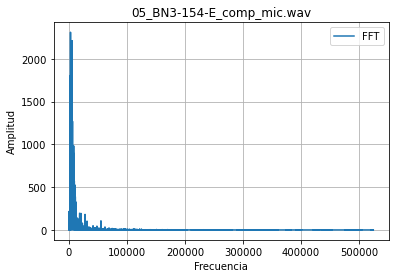

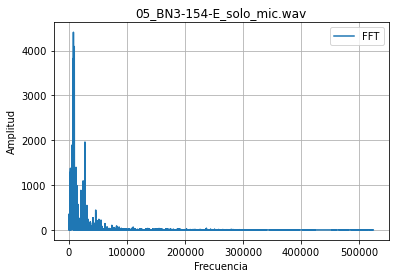

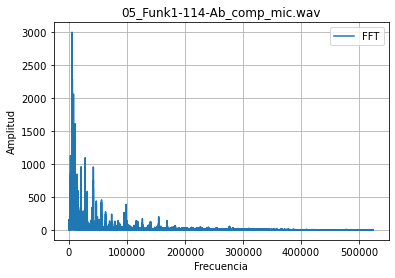

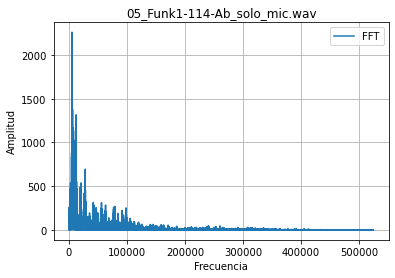

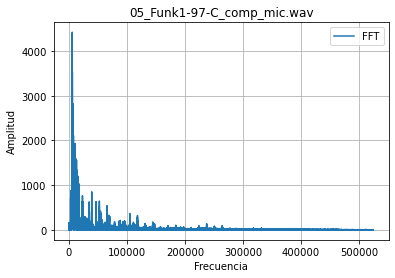

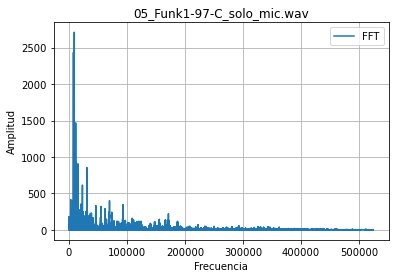

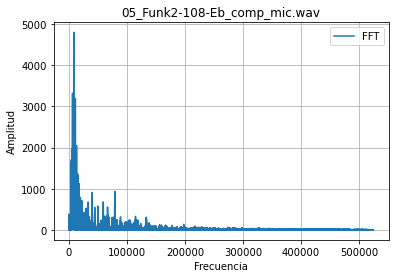

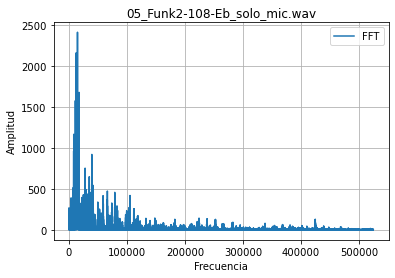

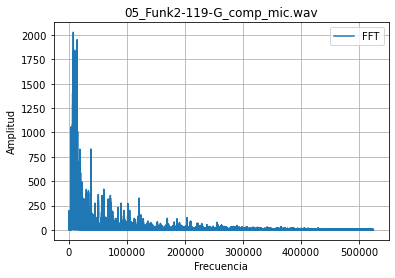

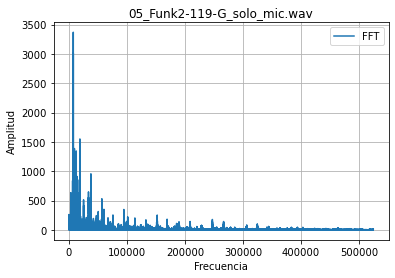

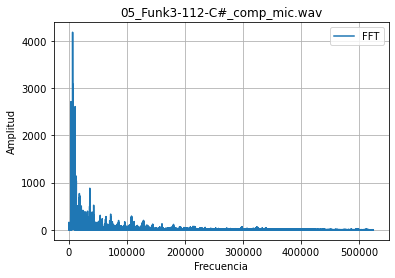

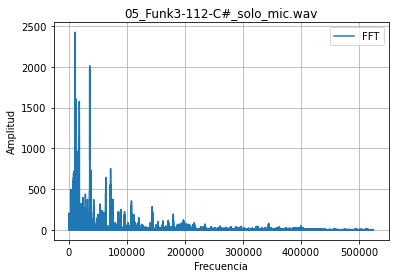

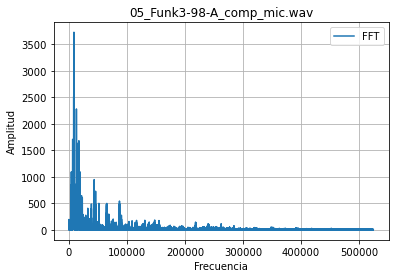

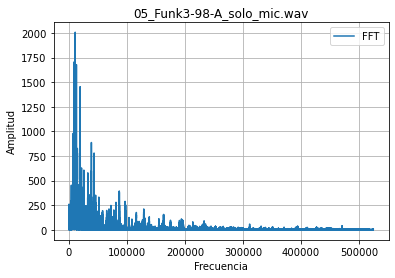

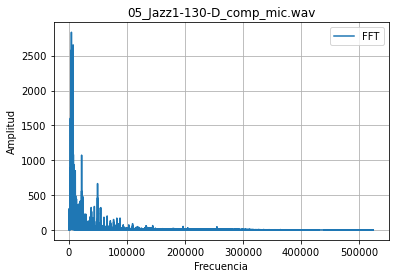

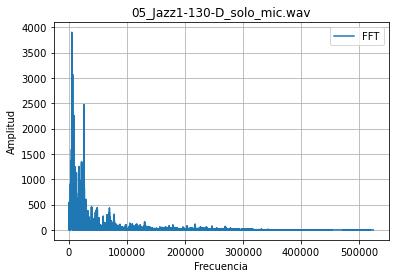

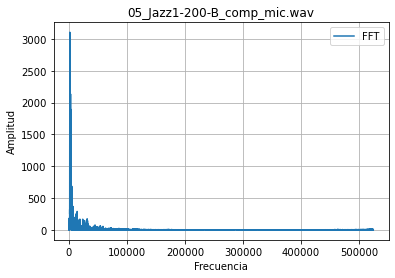

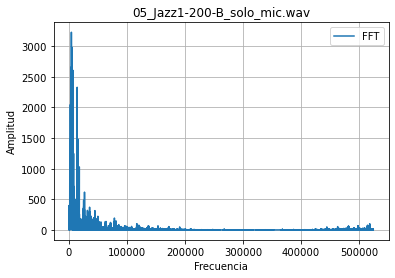

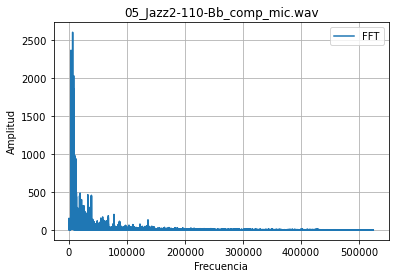

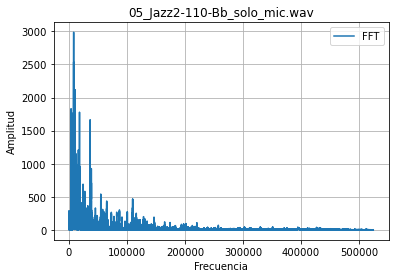

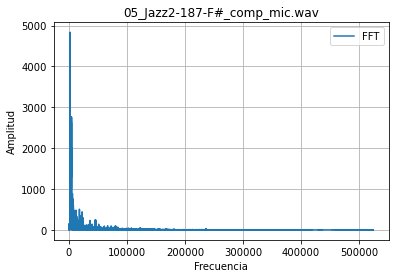

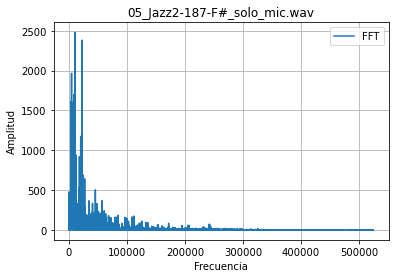

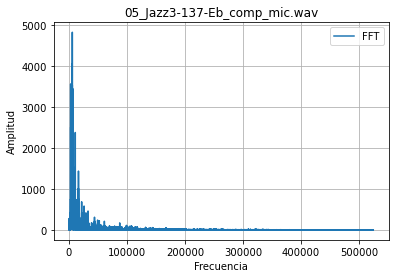

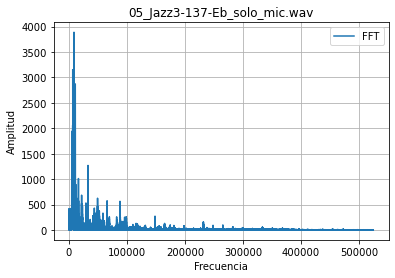

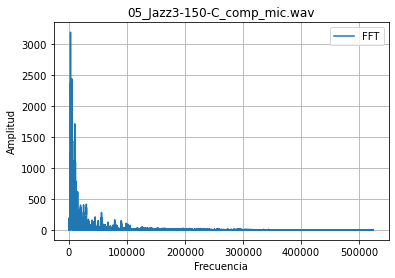

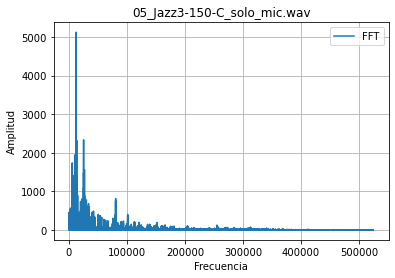

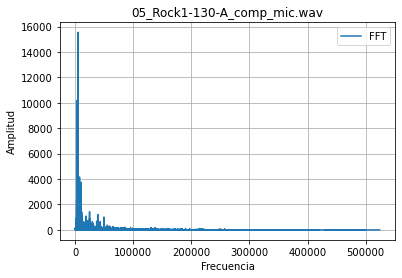

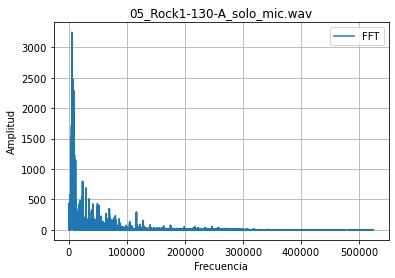

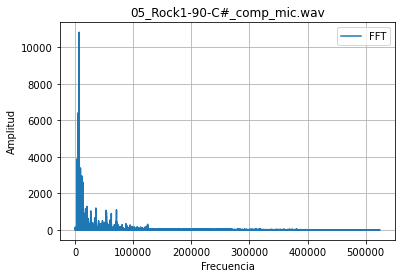

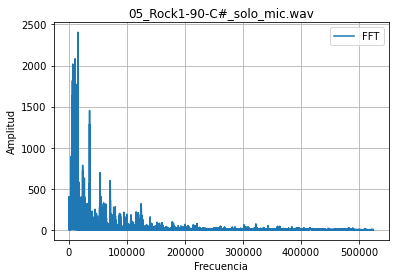

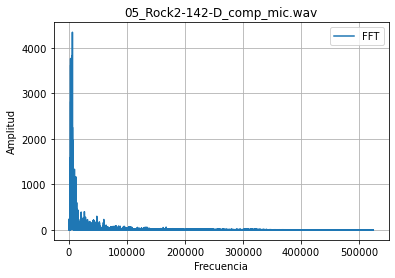

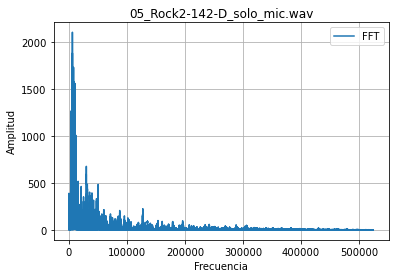

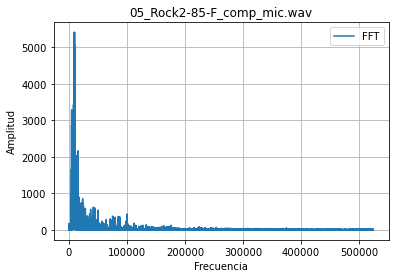

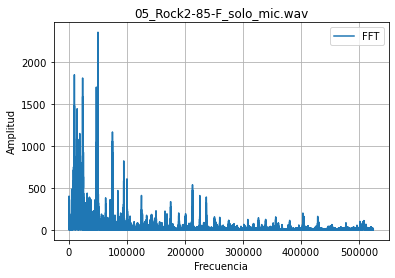

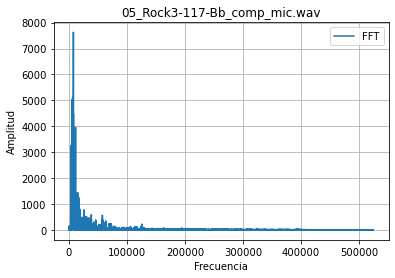

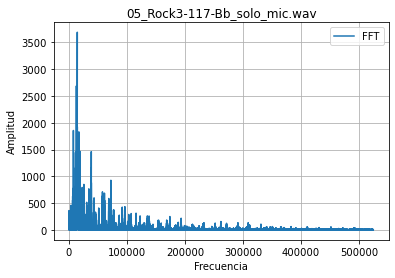

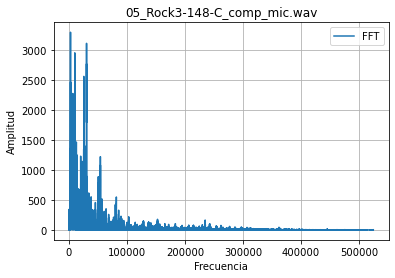

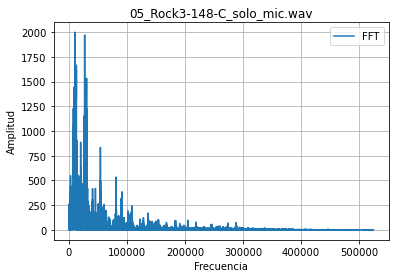

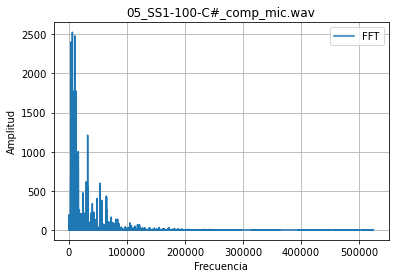

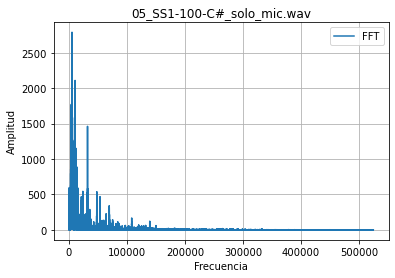

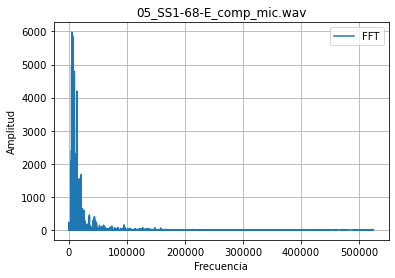

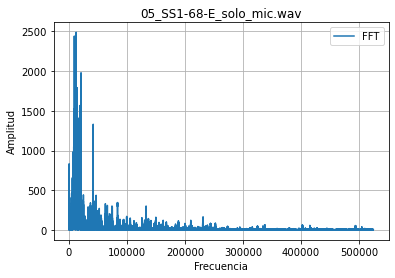

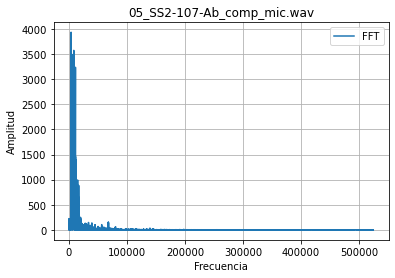

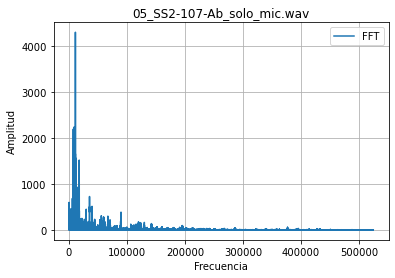

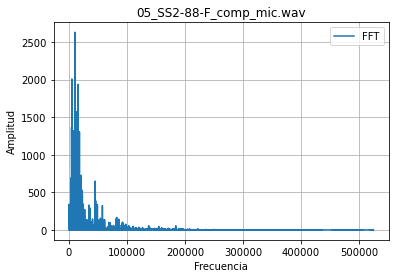

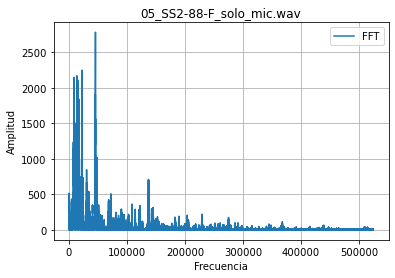

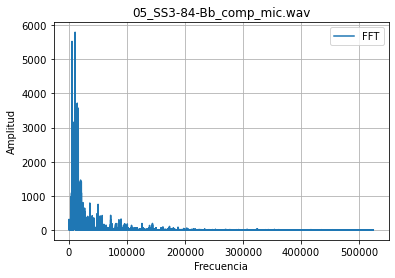

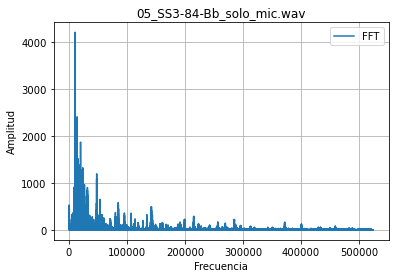

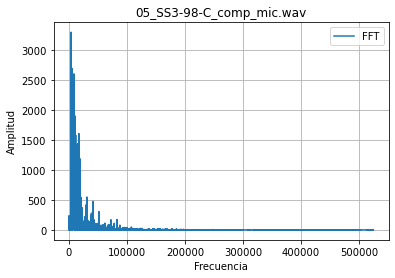

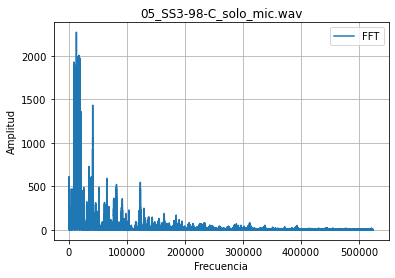

In [37]:
# Ciclo que grafica las FFT de cada una de las señales que se encuentren en la ruta "r".
#for i in range(y[i][2]):
for i in range (len(y)):
    fs = y[i][1] # Frecuencia de muestreo.
    Ts = 1/fs # Período de muestreo.
    ns = y[i][2] # Número de datos de la señal.
    f = y[i][0] # Datos de la FFT de cada señal.
    #freq = np.fft.fftshift(np.fft.fftfreq(ns,Ts)) # Véctor de frecuencias de la señal.
    #mag = np.abs(f/fs) # Véctor de magnitud de la señal.
    
    # Plotear FFT de cada señal.
    plt.plot(f, label='FFT') # Gráfica de cada FFT desde los datos de la FFT.
    plt.legend(loc='upper right')
    plt.xlabel('Frecuencia')
    plt.ylabel('Amplitud')
    plt.title(lista[i]) 
    plt.grid()
    plt.show()
    #plt.xlim(-500:500)
    #print(g)


#Romel y Víctor
#Como lo comenté antes, creo que debemos hacer unos ajustes previos a las señales, para poder identificar bien las FFT, me
#parece que están muuy raras esas FFT




In [ ]:
# Función que define el filtro, el cual tiene una frecuencia de corte normalizada igual a 0.25 o pi/4  o fs/8.
def IdealLPF(wc,L):
    n = np.arange(0,L+1)
    h = wc*np.sinc(wc*(n-(L/2)))
    return h;

# FUNCIÓN DE FILTRADO CON FFT (Subconjuntos: OLA y OLS).
# Esta función se usará tanto para OLA como OLS, la diferencia está en cómo se construye el bloque de 
# entrada y cómo se construye el bloque de salida.
# Es el filtrado de las frecuencias... la long de la FFT es H, el H está precalculado.
def FIR_FFT(x,H): 
    y = np.real(ft.ifft(ft.fft(x,len(H))*H))
    return y;

In [ ]:
# Parámtros del filtro.

N = 56 #Filter order, el número de muestras del filtro es 57... 
# NOTAS: Si no se de qué longitud es mi filtro, tampoco se de qué long. serán los buff.. y tampoco podría 
# definir la long. de la FFT... Se debe definir la long. del filtro previamente, considerando que:
# IMPORTANTE: que la long. del filtro sea tal que muestree en la meceta hasta la frec. de corte, porque si de 56 cambio
# a 10, particularmente en este ejemplo, ya no muestreo hasta 0.25, sino hasta menos. HAY QUE REVISAR ESTO, para darle
# al filtro una long. ideal.

wc = 0.25 #Cutoff frequency, es el filtro paso bajo, elimina las freq que estén por encima de la freq
# de corte... y deja pasar las que estén por debajo de esa freq.
# freq límite es 0.25 es una freq discreta normalizada, la no normalizada tiene su eje x de 
# -pi a - pi, o de -fs/2 a fs/2, la normalizada va de -1 a 1, la freq discreta norm es la que comunmente
# se usa para el diseño de filtros digitales.
# En este caso 0.25 equivale a pi/4 o fs/8.

# Parámetros del Buffer.
M = 200 #Input buffer, aplica solo a OLA y OLS. Tamaño de los bloques en los que voy a dividir mi señal
# de entrada. Se elige un valor que sumado a N, sea igual a una potencia de 2.
L = N + M #FFT size

buff_OLA = np.zeros((N,)) #Buffer for FIR_FFT

In [ ]:
# #Ciclo para calcular la Power Spectral Density de cada señal.
# for i in range(s):
#     fs = y[i][1] # Frecuencia de muestreo.
#     ns = y[i][2] # Número de datos de la señal.
#     f = y[i][0] # Datos de la FFT de cada señal.
#     psd = plt.psd(f,2**18,fs, label='PSD')
#     plt.title(lista[i])
#     plt.legend(loc='upper right')
#     plt.grid()
#     plt.xlim(0,500)
#     plt.show()
#     #print(psd)

#     '''
#     Con la PDS, se podría aplicar una función que nos calcule el valor x para cada pico y luego con un condicional, evaluar
#     a qué notas corresponden todas las frecuencias encontradas...
#     '''

In [ ]:
# #Ciclo para calcular la autocorrelación de cada señal.
# for i in range(s):
#     f = y[i][0] # Datos de la FFT de cada señal.
#     fig = tsaplots.plot_acf(f, lags=5000, label='Autocorrelación')
#     plt.title(lista[i])
#     plt.legend(loc='upper right')
#     plt.grid()
#     plt.xlim(-10,500)
#     plt.show()

**_REFERENCIAS_**

> [1] ...

In [ ]:
# total_inputs = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
# fs = 44100

# d_inputs = total_inputs.size/fs
# G_inputs = int(d_inputs*fs) # Standard axis X with time in seconds
# t_inputs = np.linspace(0,d_inputs,G_inputs)

# fft_inputs = np.fft.fft(total_inputs);
# mag_inputs = np.abs(fft_inputs/fs); # Normaliza Magnitud
# pha_inputs = np.angle(fft_inputs/fs)*180/np.pi; # Normaliza a grados
# freq_inputs = np.fft.fftfreq(G_inputs,1/fs); # Rango de frecuencia

In [ ]:
# n1 = len(fft_inputs)
# n2 = len(mag_inputs)
# n3 = len(pha_inputs)
# n4 = len(freq_inputs)
# print(n1)
# print(n2)
# print(n3)
# print(n4)